# Diabetes Health Indicators 



## About Dataset

**Diabetes** is a chronic health condition that affects how your body turns food into energy. There are three main types of diabetes: type 1, type 2, and gestational diabetes.



**Type 1** diabetes is an autoimmune disease that causes your body to attack the cells in your pancreas that produce insulin. Insulin is a hormone that helps your body use glucose for energy.



**Type 2** diabetes is the most common type of diabetes. It occurs when your body doesn't respond normally to insulin, or when your body doesn't produce enough insulin.


**Gestational diabetes** is a type of diabetes that develops during pregnancy. It usually goes away after the baby is born.


**Prevalence of Diabetes**:

According to the CDC BRFSS 2021, 34.1 million adults in the United States have diabetes, or 10.5% of the adult population. This number has been increasing over time. In 2010, 29.1 million adults in the United States had diabetes, or 9.3% of the adult population.



**Content**

The Behavioral Risk Factor Surveillance System (BRFSS) is an ongoing, state-based telephone survey that collects data about health-related risk behaviors, chronic health conditions, and the use of preventive services among adults aged 18 years and older residing in the United States. Conducted annually by the Centers for Disease Control and Prevention (CDC), the BRFSS has been providing valuable insights into the health status and behaviors of U.S. adults since its inception in 1984.



For this dataset, a csv of the 2021 BRFSS dataset available on Kaggle was used. The original dataset contains responses from 438,693 individuals and has 303 features. These features are either questions directly asked of participants, or calculated variables based on individual participant responses.



diabetes_012_health_indicators_BRFSS2021.csv is a clean dataset of 236,378 survey responses to the CDC's BRFSS2021. The target variable Diabetes_012 has 3 classes. 0 is for no diabetes or only during pregnancy, 1 is for prediabetes, and 2 is for diabetes. There is class imbalance in this dataset. This dataset has 21 feature variables.

In [519]:
# miscellaneous
import matplotlib.pyplot as plt
from glob import glob #library that helps us search for files
import scipy
import random
from datetime import datetime
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
from scipy.special import inv_boxcox

# preprocessing
from category_encoders import OneHotEncoder,TargetEncoder,OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PolynomialFeatures
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, FunctionTransformer, PowerTransformer,LabelEncoder, MaxAbsScaler, RobustScaler
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.model_selection import cross_val_score,cross_val_predict, KFold, StratifiedKFold
from sklearn.compose import ColumnTransformer

# models
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression,BayesianRidge, ElasticNet, Lasso
from sklearn.dummy import DummyClassifier
import xgboost as xgb
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.base import clone

# metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
from sklearn.metrics import log_loss, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.utils.validation import check_is_fitted

# feature selection / data sampling
from sklearn.feature_selection import RFE, SelectKBest, f_classif, SelectFromModel, VarianceThreshold
from imblearn.over_sampling import SMOTE, ADASYN
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.inspection import permutation_importance

#saving model
import pickle

# data settings
pd.pandas.set_option('display.max_rows',None)
pd.pandas.set_option('display.max_columns',None)
pd.set_option('display.max_colwidth', None)


from sklearn import set_config
set_config(transform_output = 'pandas')

import warnings
warnings.simplefilter(action="ignore")

In [2]:
# path = "C:/Users/Oamen/OneDrive/Documents/DATASETS/ml_datasets_to_do/diabetes_012_health_indicators_BRFSS2021.csv"
# new_df = pd.read_csv(path)

In [3]:
path = "C:/Users/Oamen/OneDrive/Documents/DATASETS/ml_datasets_to_do/Diabetes_indication/LLCP2021_raw.csv"

In [4]:
df = pd.read_csv(path)

In [5]:
columns_to_keep = ['DIABETE4', 'BPHIGH6','TOLDHI3' ,'CHOLCHK3', 'WEIGHT2','_SMOKER3', 'CVDSTRK3', 'CVDINFR4', '_TOTINDA',
                  'FRUIT2', 'FVGREEN1', 'AVEDRNK3', 'MEDCOST1', 'GENHLTH', 'MENTHLTH', 'PHYSHLTH', 'DIFFWALK', 'EDUCA', 'INCOME3',
                  '_AGEG5YR', 'SEXVAR', 'RENTHOM1', 'CHILDREN', 'PREGNANT', 'IDATE']

df = df[columns_to_keep]

In [6]:
df.shape

(438693, 25)

## Initial data cleaning

In [7]:
df = df.rename(columns = {
     'WEIGHT2':'Weight',
    'DIABETE4':'Diabetes_status','BPHIGH6':'HighBP',
    'TOLDHI3':'High_cholestrol','CHOLCHK3':'Cholestrol_check',
    '_BMI5':'BMI','INCOME3':'INCOME',
    '_SMOKER3':'SMoker','CVDSTRK3':'Stroke',
    'IDATE': 'DATE','EDUCA':'Education_level',
    '_TOTINDA':'Physical_activity','FRUIT2':'Has_fruits',
    'FVGREEN1':'Has_veggies','RENTHOM1':'Home_status',
    'SEXVAR':'Sex','_AGEG5YR':'Age',
    'AVEDRNK3':'Heavy_alcohol_consumption',
    'MENTHLTH':'Num_of_days_with_bad_Mental_Health',
    'MEDCOST1':'No_doctor_because_of_cost',
    'PHYSHLTH':'Num_of_days_with_bad_Physical_health',
    'GENHLTH':'General_health',
    'DIFFWALK':'Difficulty_walking',
    'CVDINFR4':'HeartDiseaseorAttack'

})

In [8]:
df[:1]

,Diabetes_status,HighBP,High_cholestrol,Cholestrol_check,Weight,SMoker,Stroke,HeartDiseaseorAttack,Physical_activity,Has_fruits,Has_veggies,Heavy_alcohol_consumption,No_doctor_because_of_cost,General_health,Num_of_days_with_bad_Mental_Health,Num_of_days_with_bad_Physical_health,Difficulty_walking,Education_level,INCOME,Age,Sex,Home_status,CHILDREN,PREGNANT,DATE
0,3.0,3.0,1.0,2.0,72.0,3,2.0,2.0,2,101.0,204.0,NaN,2.0,5.0,10.0,20.0,2.0,4.0,5.0,11,2,1.0,88.0,NaN,1192021


In [9]:
# convert target column to 0 = no diabetes, 1 = prediabetes, 2 = diabetes

df['Diabetes_status'] = np.where(df['Diabetes_status'] == 4, 1, np.where(df['Diabetes_status'].isin([1,2]), 2, 
                                                                         np.where(df['Diabetes_status'] == 3, 0, df['Diabetes_status']
                                                                        )))

In [10]:
df = df[df['Diabetes_status'].isin([0, 1, 2])]

In [11]:
def convert_columns_binary(column, yes_values, no_values, nan_values):
    
    converted_column = np.where(df[column].isin(yes_values), 1, 
                               np.where(df[column].isin(no_values), 0,
                                       np.where(df[column].isin(nan_values), np.nan, df[column])))
    return converted_column

In [12]:
# convert HighBP column to 0 = no high BP, 1 = high BP

df['HighBP'] = convert_columns_binary('HighBP', [1,2,4], [3], [7,9])

In [13]:
# convert High_cholestrol column to 0 = no high cholesterol, 1 = high cholesterol

df['High_cholestrol'] = convert_columns_binary('High_cholestrol', [1], [2], [7,9])

In [14]:
# convert Cholestrol_check column to 0 = no cholesterol check in 5 years, 1 = yes cholesterol check in 5 years

df['Cholestrol_check'] = convert_columns_binary('Cholestrol_check', [2,3,4,5,6,8], [1], [7,9])

In [15]:
# convert smoker 0 = no, 1 = yes

df['SMoker'] = convert_columns_binary('SMoker', yes_values = [1,2,3], no_values = [4], nan_values = [7,9])

In [16]:
# convert HeartDiseaseorAttack 0 = no, 1 = yes

df['HeartDiseaseorAttack'] = convert_columns_binary('HeartDiseaseorAttack', yes_values = [1], no_values = [2], nan_values = [7,9])

In [17]:
# convert Stroke 0 = no, 1 = yes

df['Stroke'] = convert_columns_binary('Stroke', yes_values = [1], no_values = [2], nan_values = [7,9])

In [18]:
# convert Physical_activity 0 = no, 1 = yes

df['Physical_activity'] = convert_columns_binary('Physical_activity', yes_values = [1], no_values = [2], nan_values = [7,9])

In [19]:
# convert Has_fruits 0 = no, 1 = yes

df['Has_fruits'] = convert_columns_binary('Has_fruits', yes_values = [x for x in range(101, 400)], no_values = [555], nan_values = [777,999])

In [20]:
# convert Has_veggies 0 = no, 1 = yes

df['Has_veggies'] = convert_columns_binary('Has_veggies', yes_values = [x for x in range(101, 400)], no_values = [555], nan_values = [777,999])

In [21]:
# convert Heavy_alcohol_consumption 0 = no, 1 = yes

df['Heavy_alcohol_consumption'] = convert_columns_binary('Heavy_alcohol_consumption', yes_values = [x for x in range(77)], no_values = [88], nan_values = [77,99, 888, 777, 999])

In [22]:
# convert No_doctor_because_of_cost 0 = no, 1 = yes

df['No_doctor_because_of_cost'] = convert_columns_binary('No_doctor_because_of_cost', yes_values = [1], no_values = [2], nan_values = [7,9])

In [23]:
# convert Difficulty_walking 0 = no, 1 = yes

df['Difficulty_walking'] = convert_columns_binary('Difficulty_walking', yes_values = [1], no_values = [2], nan_values = [7,9])

In [24]:
# convert Home_status 0 = no, 1 = yes

df['Home_status'] = convert_columns_binary('Home_status', yes_values = [1,2], no_values = [3], nan_values = [7,9])

In [25]:
# convert CHILDREN 0 = no, 1 = yes

df['CHILDREN'] = convert_columns_binary('CHILDREN', yes_values = [x for x in range(88)], no_values = [88], nan_values = [99])

In [26]:
# convert PREGNANT 0 = no, 1 = yes

df['PREGNANT'] = convert_columns_binary('PREGNANT', yes_values = [1], no_values = [2], nan_values = [7,9])

In [27]:
# convert date column
df['DATE'] = '0' + df['DATE'].astype(str)

In [28]:
# year - month - day
df['DATE'] = df['DATE'].astype(str).str[-4:] + '-' + df['DATE'].astype(str).str[-8:-6] + '-' + df['DATE'].astype(str).str[-6:-4]

In [29]:
# convert weight 
df['Weight'] = np.where(df['Weight'].isin([7777, 9999]), np.nan, df['Weight'])

df = df[df['Weight'] <= 776]

In [30]:
df['Age'] = df['Age'].replace({
    1: 'Age 18 to 24',
    2: 'Age 25 to 29',
    3: 'Age 30 to 34',
    4: 'Age 35 to 39',
    5: 'Age 40 to 44',
    6: 'Age 45 to 49',
    7: 'Age 50 to 54',
    8: 'Age 55 to 59',
    9: 'Age 60 to 64',
    10: 'Age 65 to 69',
    11: 'Age 70 to 74',
    12: 'Age 75 to 79',
    13: 'Age 80 or older',
    14: np.nan,
  
})

In [31]:
column_uniques = {column: df[column].nunique() for column in df.columns}

In [32]:
to_change = {column: nuniques for column,  nuniques in column_uniques.items() if nuniques<=4}
to_change

{'Diabetes_status': 3,
 'HighBP': 2,
 'High_cholestrol': 2,
 'Cholestrol_check': 2,
 'SMoker': 2,
 'Stroke': 2,
 'HeartDiseaseorAttack': 2,
 'Physical_activity': 2,
 'Has_fruits': 2,
 'Has_veggies': 2,
 'Heavy_alcohol_consumption': 2,
 'No_doctor_because_of_cost': 2,
 'Difficulty_walking': 2,
 'Sex': 2,
 'Home_status': 2,
 'CHILDREN': 2,
 'PREGNANT': 2}

In [33]:
{column: str(df[column].unique()) for column in to_change}

{'Diabetes_status': '[0. 2. 1.]',
 'HighBP': '[ 0.  1. nan]',
 'High_cholestrol': '[ 1.  0. nan]',
 'Cholestrol_check': '[ 1. nan  0.]',
 'SMoker': '[ 1.  0. nan]',
 'Stroke': '[ 0.  1. nan]',
 'HeartDiseaseorAttack': '[ 0.  1. nan]',
 'Physical_activity': '[ 0.  1. nan]',
 'Has_fruits': '[ 1. nan  0.]',
 'Has_veggies': '[ 1.  0. nan]',
 'Heavy_alcohol_consumption': '[nan  1.  0.]',
 'No_doctor_because_of_cost': '[ 0.  1. nan]',
 'Difficulty_walking': '[ 0.  1. nan]',
 'Sex': '[2 1]',
 'Home_status': '[ 1. nan  0.]',
 'CHILDREN': '[ 0.  1. nan]',
 'PREGNANT': '[nan  0.  1.]'}

In [34]:
# for column in to_change:
#     df[column] = df[column].astype(int)

## Initial Data Cleaning

In [35]:
def num_to_text_multiple(column, new_value_1, new_value_2, new_value_3):
    
    changed_column = df[column].replace({0.0: new_value_1,
                                    1.0: new_value_2,
                                    2.0: new_value_3})
    return changed_column

In [36]:
df['Diabetes_status'] = num_to_text_multiple('Diabetes_status', 'No diabetes', 'Prediabetes', 'Diabetes')
df['Diabetes_status'][:3]

0    No diabetes
2       Diabetes
3       Diabetes
Name: Diabetes_status, dtype: object

In [37]:
def num_to_text_binary(column, new_value_1, new_value_2):
    
    changed_column = df[column].replace({0.0:new_value_1,
                                        1.0:new_value_2})
    return changed_column

In [38]:
binary_to_change = {column: unique for column, unique in to_change.items() if column != 'Diabetes_012'}
binary_to_change

{'Diabetes_status': 3,
 'HighBP': 2,
 'High_cholestrol': 2,
 'Cholestrol_check': 2,
 'SMoker': 2,
 'Stroke': 2,
 'HeartDiseaseorAttack': 2,
 'Physical_activity': 2,
 'Has_fruits': 2,
 'Has_veggies': 2,
 'Heavy_alcohol_consumption': 2,
 'No_doctor_because_of_cost': 2,
 'Difficulty_walking': 2,
 'Sex': 2,
 'Home_status': 2,
 'CHILDREN': 2,
 'PREGNANT': 2}

In [39]:
for column in binary_to_change:
    
    if column != 'Sex':
        df[column] = num_to_text_binary(column, 'No', 'Yes')

In [40]:
df['Sex'] = df['Sex'].replace({1.0:'Male',
                                        2.0:'Female'})

In [41]:
df['General_health'] = df['General_health'].replace({
    1:'Excellent',
    2:'Very good',
    3:'Good',
    4:'Fair',
    5:'Poor',
    7:np.nan,
    9:np.nan,
 })

In [42]:
df['Num_of_days_with_bad_Mental_Health'] = df['Num_of_days_with_bad_Mental_Health'].replace({
    77:np.nan,
    99:np.nan,
    88: 0
 })

In [43]:
df['Num_of_days_with_bad_Physical_health'] = df['Num_of_days_with_bad_Physical_health'].replace({
    77:np.nan,
    99:np.nan,
    88: 0
 })

In [44]:
df['Num_of_days_with_bad_Physical_health'] = df['Num_of_days_with_bad_Physical_health'].replace({
    77:np.nan,
    99:np.nan,
    88: 0
 })

In [45]:
df['Education_level'] = df['Education_level'].replace({
    1:'No-school',
    2:'Elementary',
    3:'Some high school',
    4:'High school graduate',
    5:'Some college or technical school',
    6:'College',
    9:np.nan,
 })

In [46]:
df['INCOME'] = df['INCOME'].replace({
    1:'Less than $10,000',
    2:'Less than $15,000',
    3:'Less than $20,000',
    4:'Less than $25,000',
    5:'Less than $35,000',
    6:'Less than $50,000',
    7:'Less than $75,000',
    8:'Less than $100,000',
    9: 'Less than $150,000',
    10: 'Less than $200,000',
    11:'$200,000 or more',
    99:np.nan,
    77:np.nan,

 })

In [47]:
df[:3]

,Diabetes_status,HighBP,High_cholestrol,Cholestrol_check,Weight,SMoker,Stroke,HeartDiseaseorAttack,Physical_activity,Has_fruits,Has_veggies,Heavy_alcohol_consumption,No_doctor_because_of_cost,General_health,Num_of_days_with_bad_Mental_Health,Num_of_days_with_bad_Physical_health,Difficulty_walking,Education_level,INCOME,Age,Sex,Home_status,CHILDREN,PREGNANT,DATE
0,No diabetes,No,Yes,Yes,72.0,Yes,No,No,No,Yes,Yes,NaN,No,Poor,10.0,20.0,No,High school graduate,"Less than $35,000",Age 70 to 74,Female,Yes,No,NaN,2021-01-19
2,Diabetes,Yes,No,Yes,170.0,No,No,No,No,Yes,No,NaN,No,Very good,0.0,0.0,No,High school graduate,"Less than $20,000",Age 70 to 74,Female,Yes,No,NaN,2021-01-21
3,Diabetes,Yes,Yes,Yes,195.0,No,No,No,Yes,Yes,Yes,Yes,No,Very good,10.0,0.0,No,High school graduate,"Less than $75,000",Age 60 to 64,Female,Yes,No,NaN,2021-01-17


In [48]:
# save data

df.to_csv("C:/Users/Oamen/OneDrive/Documents/DATASETS/ml_datasets_to_do/LLCP2021_cleaned.csv")

## Split Data

In [49]:
full_train, test = train_test_split(df, test_size = 0.2, random_state = 90)

train, validation = train_test_split(full_train, test_size = 0.2, random_state = 90)

In [50]:
[x.shape for x in [test, train, validation]]

[(79225, 25), (253516, 25), (63380, 25)]

## Data Exploration

In [51]:
df = train.sample(50000)

In [52]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 253516 entries, 419188 to 191326
Data columns (total 25 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Diabetes_status                       253516 non-null  object 
 1   HighBP                                252694 non-null  object 
 2   High_cholestrol                       217262 non-null  object 
 3   Cholestrol_check                      236956 non-null  object 
 4   Weight                                253516 non-null  float64
 5   SMoker                                247121 non-null  object 
 6   Stroke                                252860 non-null  object 
 7   HeartDiseaseorAttack                  252199 non-null  object 
 8   Physical_activity                     253102 non-null  object 
 9   Has_fruits                            236840 non-null  object 
 10  Has_veggies                           236505 non-null  object 


In [53]:
train.describe(include = 'O')

,Diabetes_status,HighBP,High_cholestrol,Cholestrol_check,SMoker,Stroke,HeartDiseaseorAttack,Physical_activity,Has_fruits,Has_veggies,Heavy_alcohol_consumption,No_doctor_because_of_cost,General_health,Difficulty_walking,Education_level,INCOME,Age,Sex,Home_status,CHILDREN,PREGNANT,DATE
count,253516,252694,217262,236956,247121,252860,252199,253102,236840,236505,125770,252873,252937,249776,252800,208916,250398,253516,251958,251906,46424,253516
unique,3,2,2,2,2,2,2,2,2,2,2,2,5,2,6,11,13,2,2,2,2,420
top,No diabetes,No,No,Yes,No,No,No,Yes,Yes,Yes,Yes,No,Very good,No,College,"Less than $75,000",Age 65 to 69,Female,Yes,No,No,2021-03-10
freq,211948,147918,129645,218717,145885,242705,238531,192329,230271,219315,124905,234066,86722,209762,103551,36107,26695,131536,239674,186496,45049,1120


In [54]:
df.describe()

,Weight,Num_of_days_with_bad_Mental_Health,Num_of_days_with_bad_Physical_health
count,50000.000000,49220.000000,49019.000000
mean,183.848580,4.156948,3.828352
std,47.693282,8.175189,8.371475
min,50.000000,0.000000,0.000000
25%,150.000000,0.000000,0.000000
50%,180.000000,0.000000,0.000000
75%,210.000000,4.000000,2.000000
max,600.000000,30.000000,30.000000


### Check for duplicates

In [55]:
print(f'Number of duplicate rows in data: {len(df[df.duplicated()])}')

Number of duplicate rows in data: 1


### Whitespace check

In [56]:
# column
[column for column in df.columns if column.startswith(' ') or column.endswith(' ') or ' ' in column]

[]

In [57]:
# row

for column in df.columns:
    temp = df[df[column] == ' ']
    
    if len(temp) > 0:
        print(f'{column} has {len(temp)} whitespace rows 🔴')
        
    print(f'{column} has no whitespace rows 🟢')
    
    print()

Diabetes_status has no whitespace rows 🟢

HighBP has no whitespace rows 🟢

High_cholestrol has no whitespace rows 🟢

Cholestrol_check has no whitespace rows 🟢

Weight has no whitespace rows 🟢

SMoker has no whitespace rows 🟢

Stroke has no whitespace rows 🟢

HeartDiseaseorAttack has no whitespace rows 🟢

Physical_activity has no whitespace rows 🟢

Has_fruits has no whitespace rows 🟢

Has_veggies has no whitespace rows 🟢

Heavy_alcohol_consumption has no whitespace rows 🟢

No_doctor_because_of_cost has no whitespace rows 🟢

General_health has no whitespace rows 🟢

Num_of_days_with_bad_Mental_Health has no whitespace rows 🟢

Num_of_days_with_bad_Physical_health has no whitespace rows 🟢

Difficulty_walking has no whitespace rows 🟢

Education_level has no whitespace rows 🟢

INCOME has no whitespace rows 🟢

Age has no whitespace rows 🟢

Sex has no whitespace rows 🟢

Home_status has no whitespace rows 🟢

CHILDREN has no whitespace rows 🟢

PREGNANT has no whitespace rows 🟢

DATE has no whites

### Null values

In [58]:
nulls = df.isnull().sum().sum()

total = np.product(df.shape)

print(f'{np.round((nulls/total)*100, 3)}% of data is missing')

7.825% of data is missing


In [59]:
df.isnull().mean() * 100

Diabetes_status                          0.000
HighBP                                   0.296
High_cholestrol                         14.062
Cholestrol_check                         6.488
Weight                                   0.000
SMoker                                   2.472
Stroke                                   0.246
HeartDiseaseorAttack                     0.502
Physical_activity                        0.174
Has_fruits                               6.656
Has_veggies                              6.804
Heavy_alcohol_consumption               50.378
No_doctor_because_of_cost                0.254
General_health                           0.250
Num_of_days_with_bad_Mental_Health       1.560
Num_of_days_with_bad_Physical_health     1.962
Difficulty_walking                       1.474
Education_level                          0.266
INCOME                                  17.568
Age                                      1.252
Sex                                      0.000
Home_status  

<Axes: >

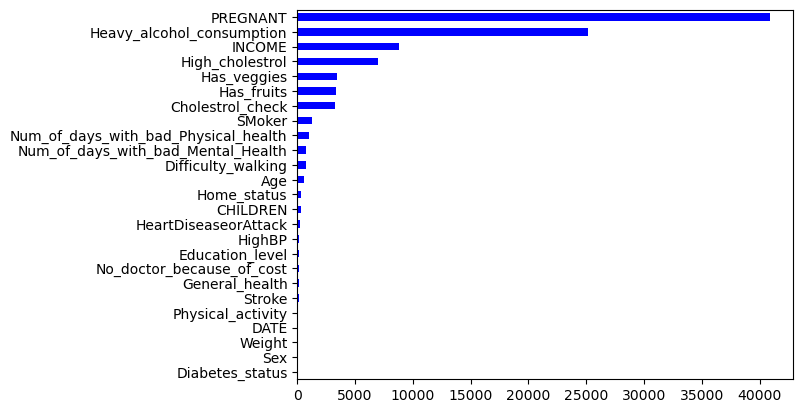

In [60]:
df.isnull().sum().sort_values().plot(kind = 'barh', color = 'blue')

### Univariate analysis and numerical distribution

In [61]:
numerical_cols = df.select_dtypes('number').columns
numerical_cols

Index(['Weight', 'Num_of_days_with_bad_Mental_Health',
       'Num_of_days_with_bad_Physical_health'],
      dtype='object')

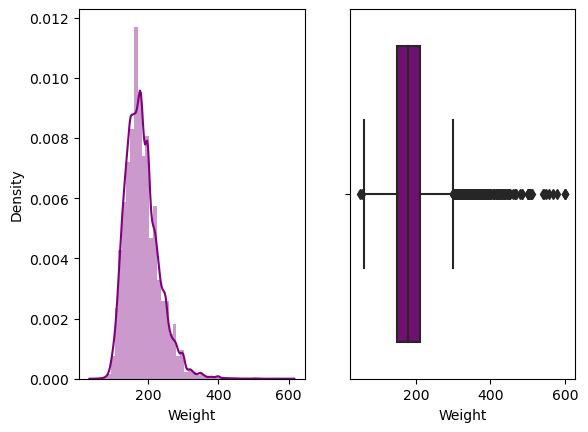

<Figure size 640x480 with 0 Axes>

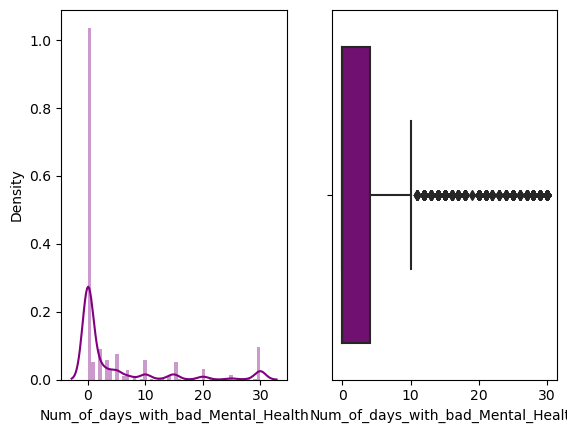

<Figure size 640x480 with 0 Axes>

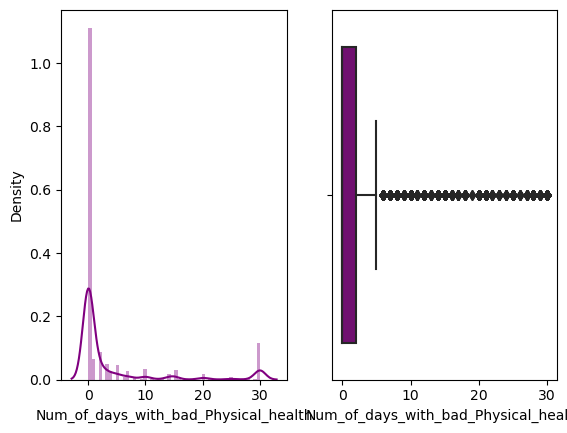

<Figure size 640x480 with 0 Axes>

In [62]:
for column in numerical_cols:
    
    fig, ax = plt.subplots(1,2)
    
    plt.figure()

    sns.distplot(df[column], kde=True, color = 'purple', ax = ax[0])

    sns.boxplot(data = df, x = column, color = 'purple', ax = ax[1])
    
    plt.subplots_adjust(hspace = 2, wspace = 2)

### Univariate analysis and categorical cardinality

In [63]:
categorical_columns = df.select_dtypes('O').columns.tolist()
categorical_columns.remove('DATE')
categorical_columns 

['Diabetes_status',
 'HighBP',
 'High_cholestrol',
 'Cholestrol_check',
 'SMoker',
 'Stroke',
 'HeartDiseaseorAttack',
 'Physical_activity',
 'Has_fruits',
 'Has_veggies',
 'Heavy_alcohol_consumption',
 'No_doctor_because_of_cost',
 'General_health',
 'Difficulty_walking',
 'Education_level',
 'INCOME',
 'Age',
 'Sex',
 'Home_status',
 'CHILDREN',
 'PREGNANT']

In [64]:
for column in categorical_columns:
    
    print(f'Number of unique values in {column}: {df[column].nunique()}')

    print(f'Unique values in {column}: {df[column].unique()}')

    print(f'Frequency of unique values in {column}: {df[column].value_counts(sort = True, normalize = True)}')
    
    print('------------------------------------------------------------------')
    
    print()

Number of unique values in Diabetes_status: 3
Unique values in Diabetes_status: ['Diabetes' 'Prediabetes' 'No diabetes']
Frequency of unique values in Diabetes_status: No diabetes    0.83678
Diabetes       0.14028
Prediabetes    0.02294
Name: Diabetes_status, dtype: float64
------------------------------------------------------------------

Number of unique values in HighBP: 2
Unique values in HighBP: ['Yes' 'No' nan]
Frequency of unique values in HighBP: No     0.587038
Yes    0.412962
Name: HighBP, dtype: float64
------------------------------------------------------------------

Number of unique values in High_cholestrol: 2
Unique values in High_cholestrol: ['Yes' nan 'No']
Frequency of unique values in High_cholestrol: No     0.597035
Yes    0.402965
Name: High_cholestrol, dtype: float64
------------------------------------------------------------------

Number of unique values in Cholestrol_check: 2
Unique values in Cholestrol_check: ['Yes' nan 'No']
Frequency of unique values in 

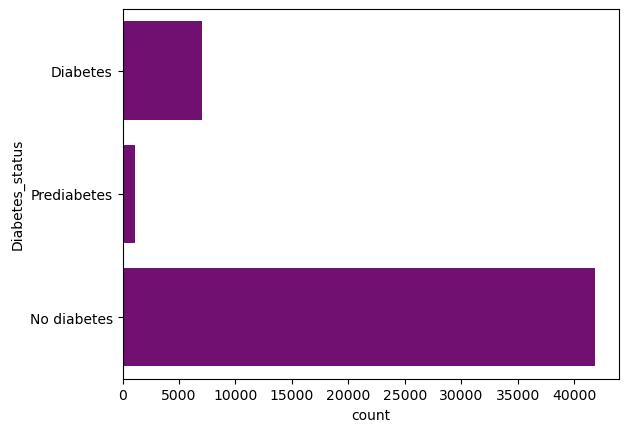

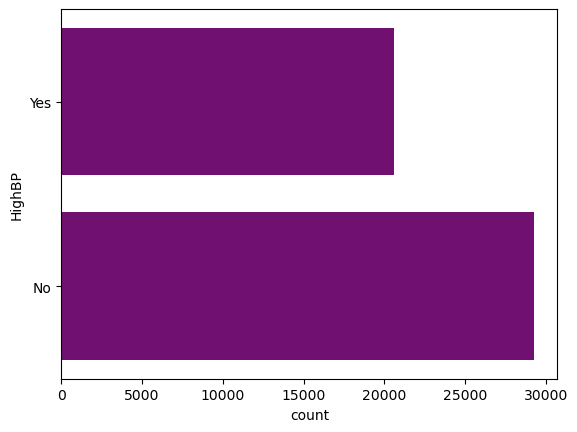

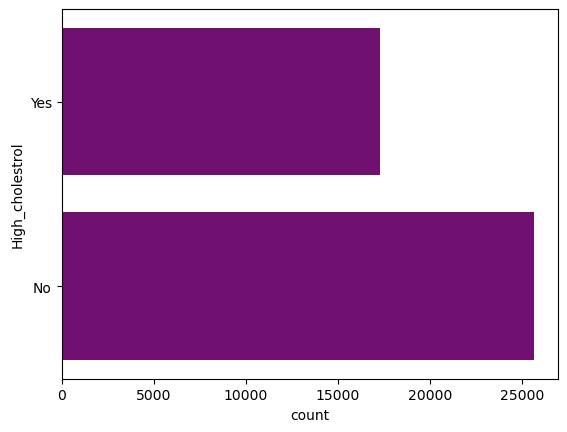

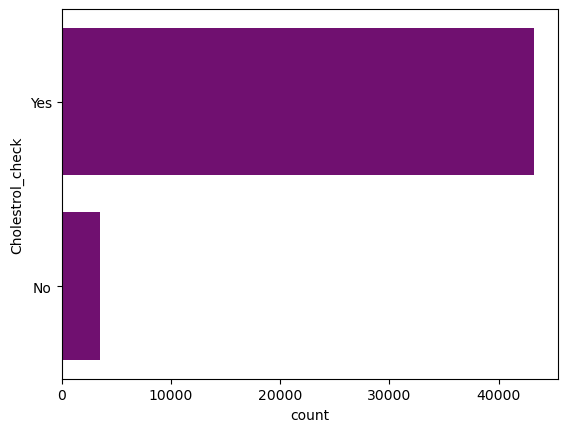

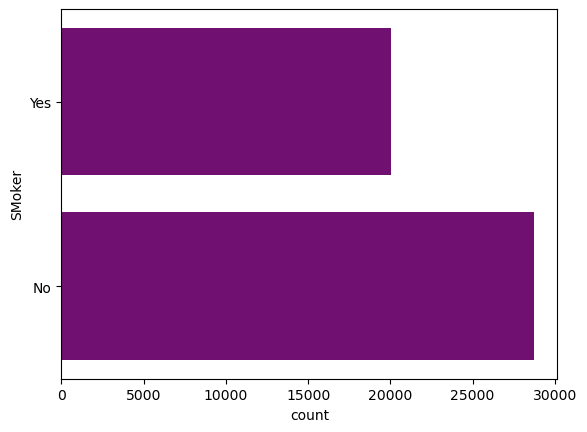

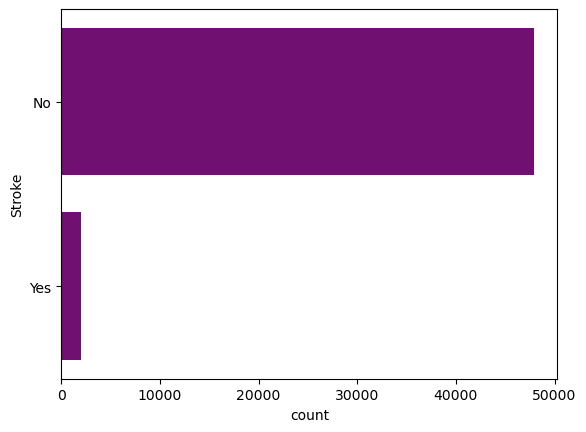

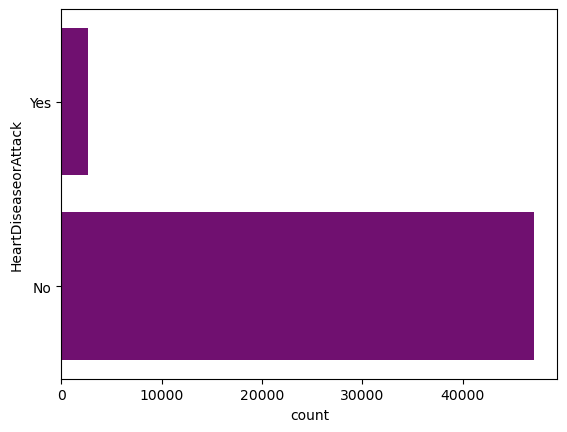

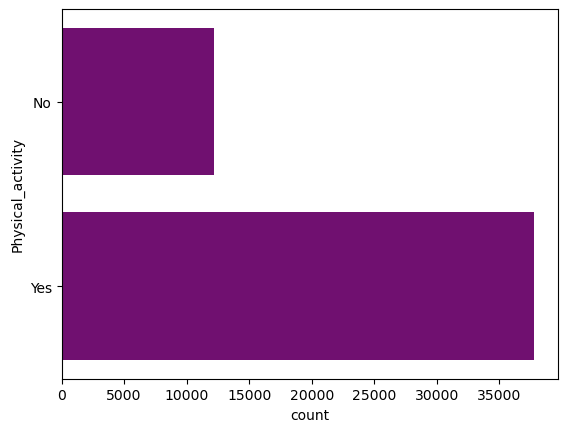

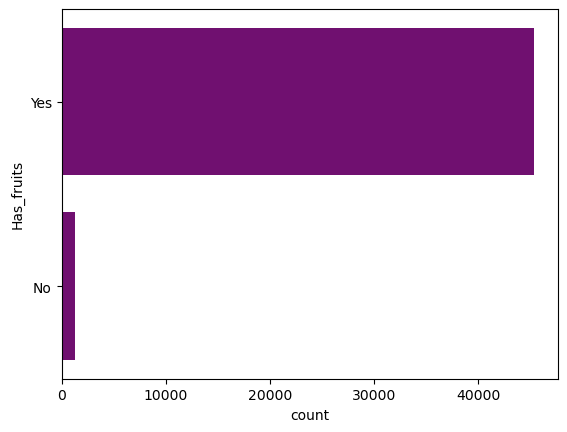

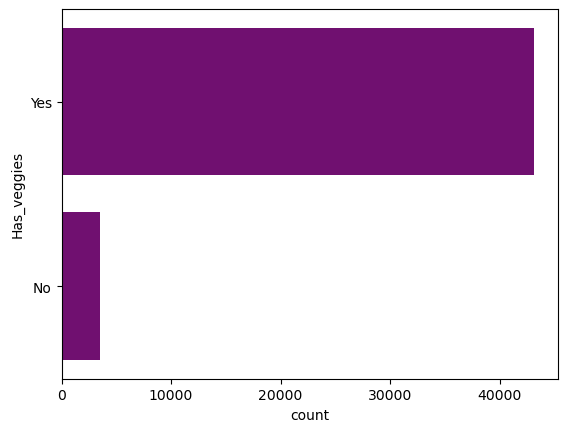

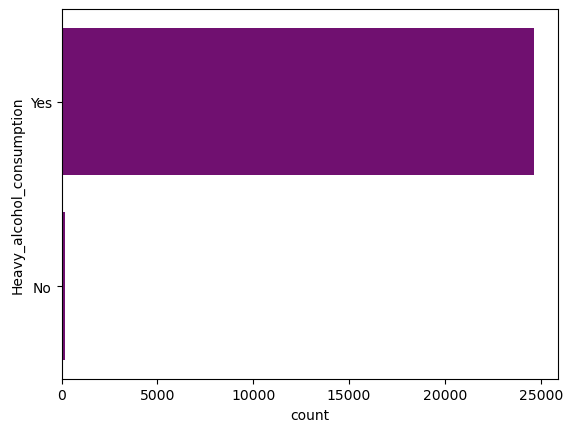

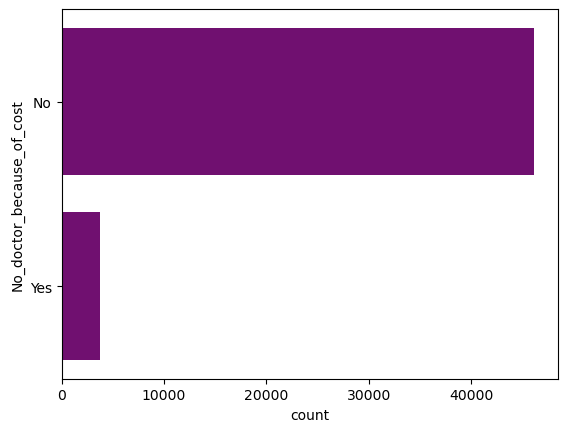

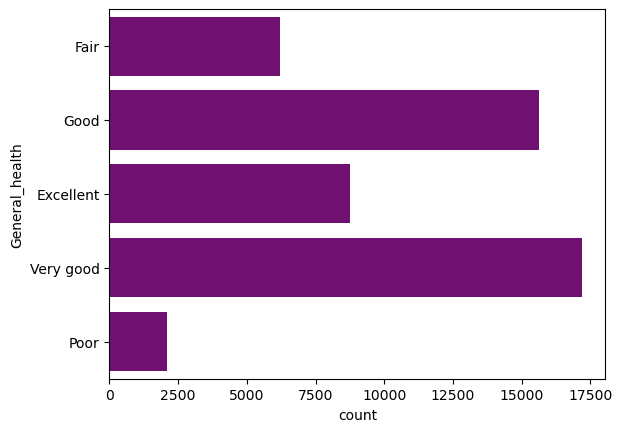

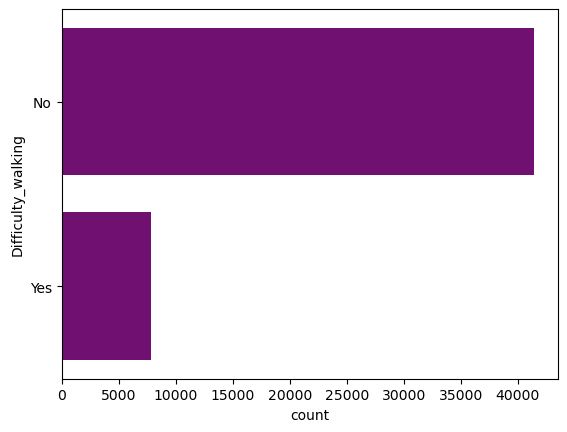

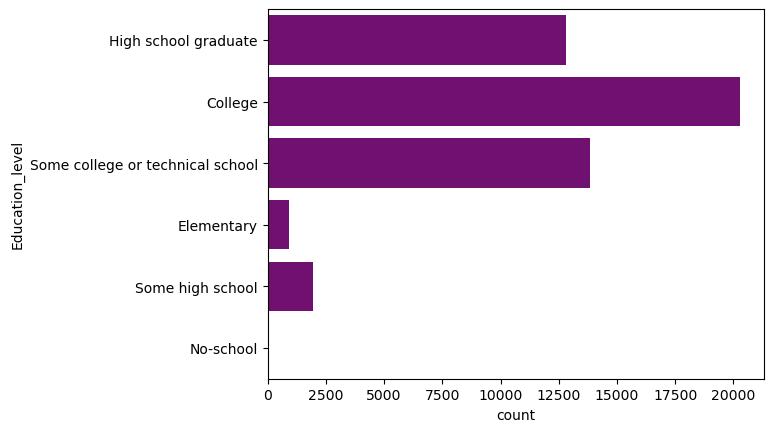

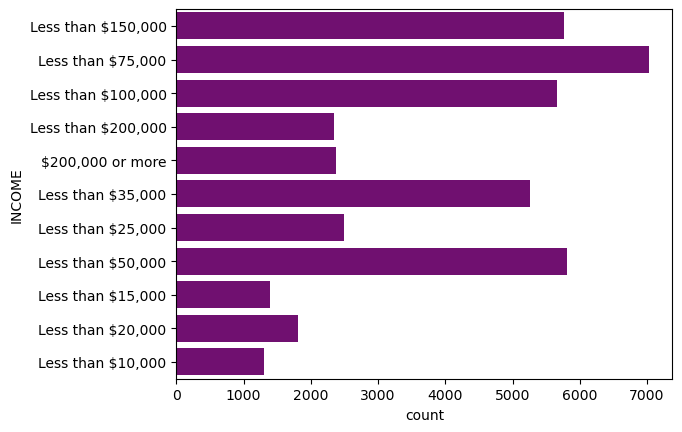

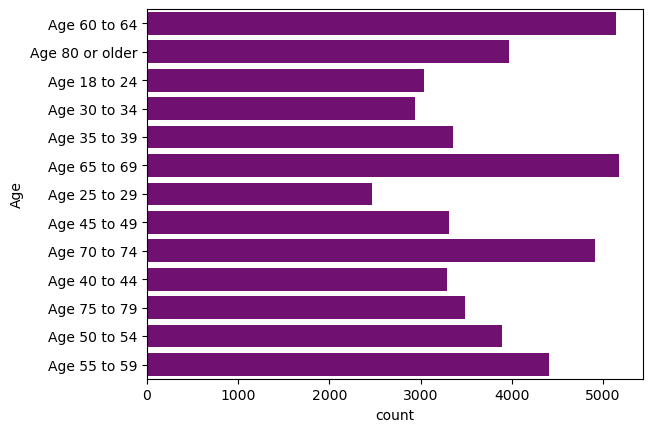

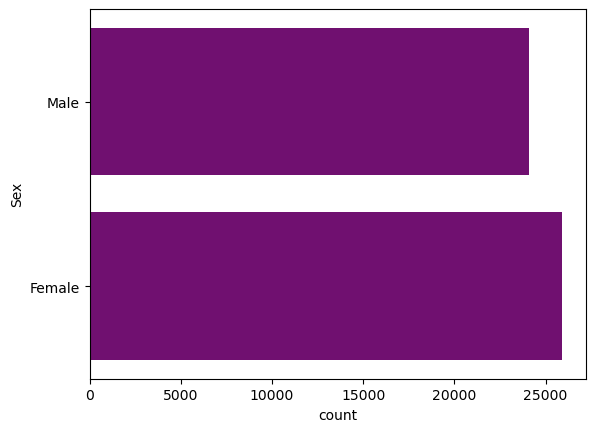

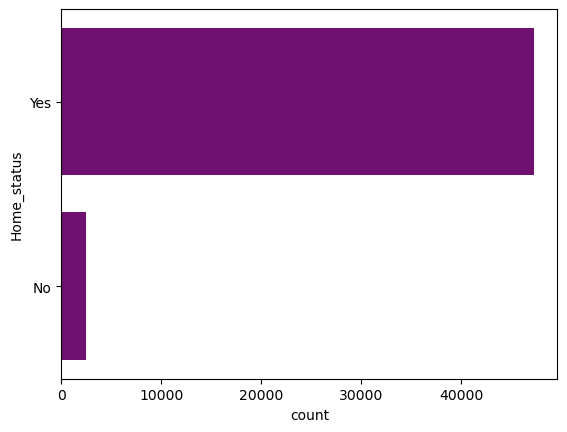

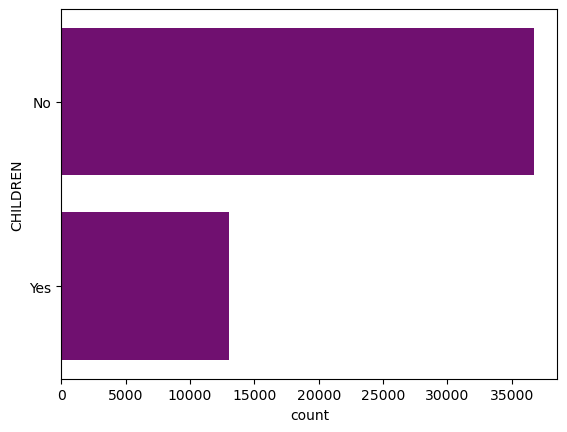

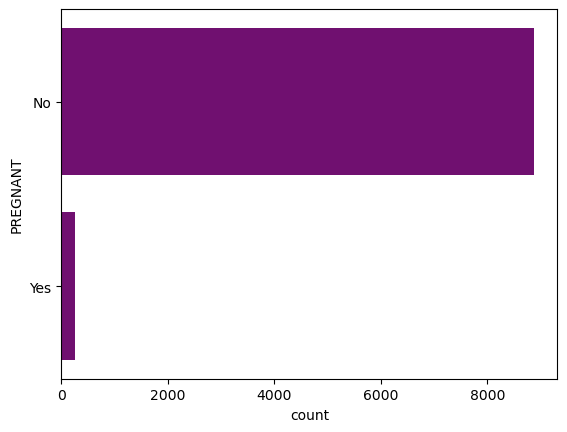

In [65]:
for column in categorical_columns:
    
    plt.figure()
    
    sns.countplot(data = df, y = column, color = 'purple')

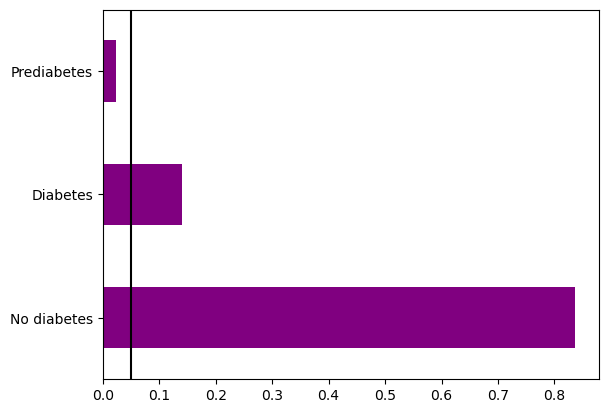

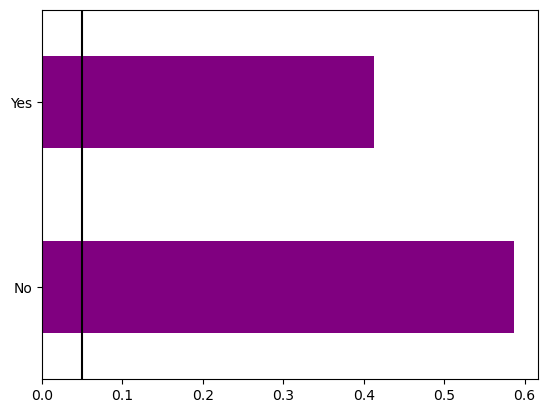

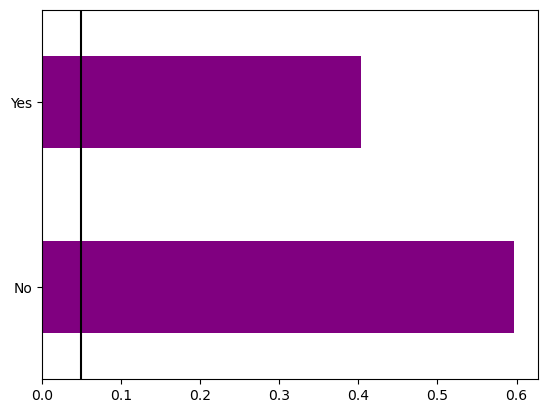

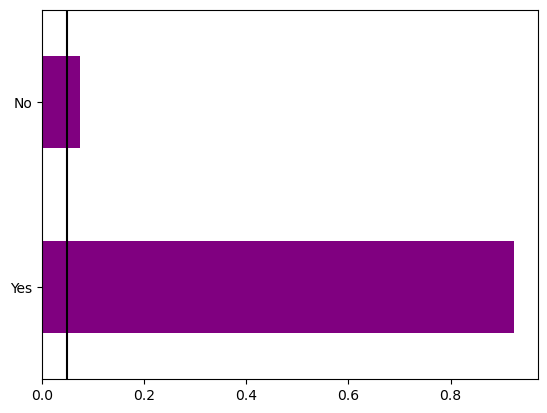

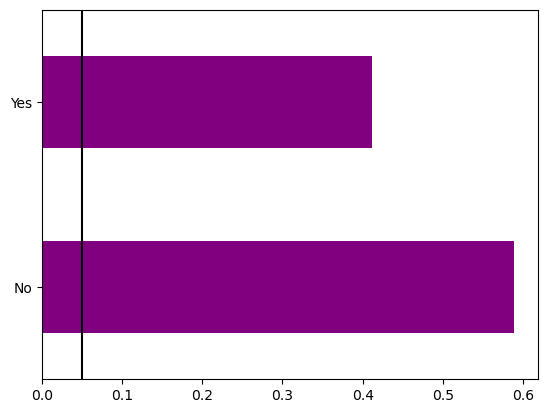

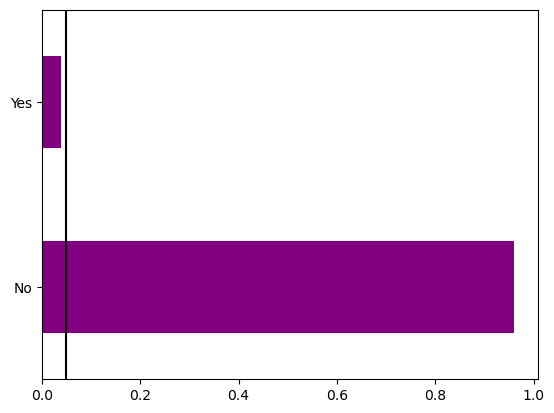

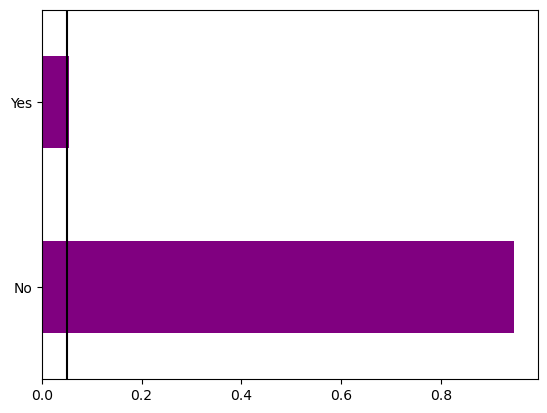

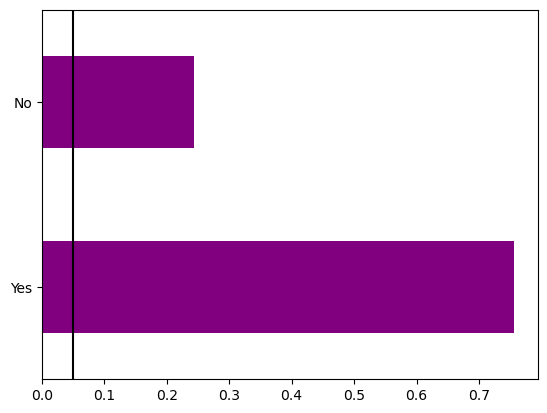

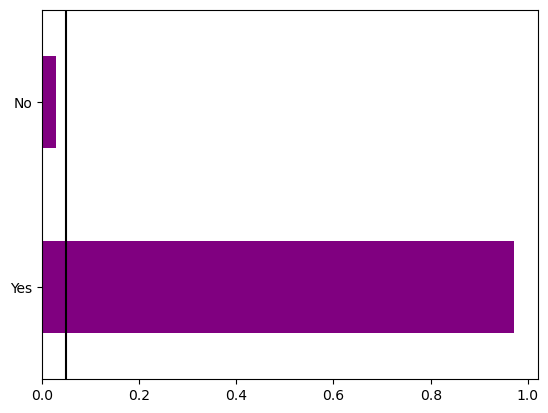

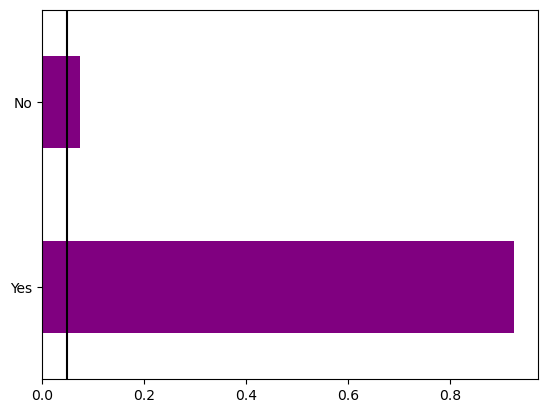

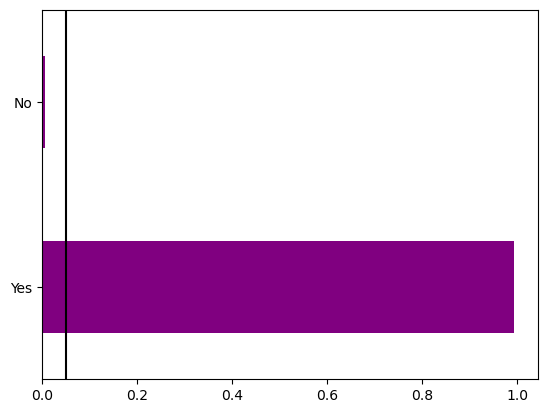

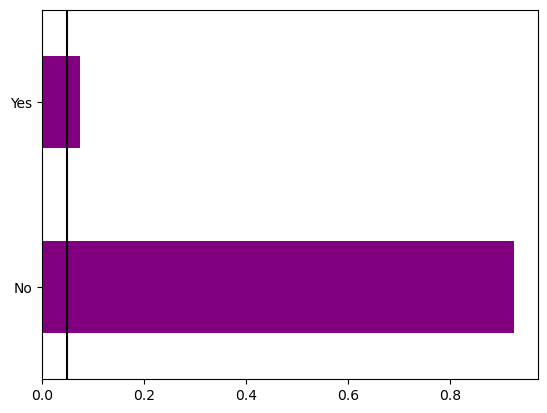

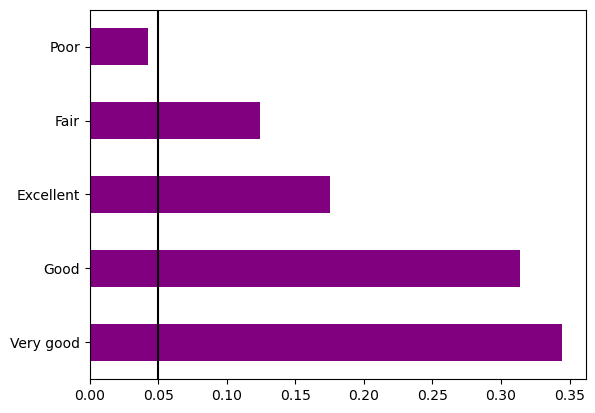

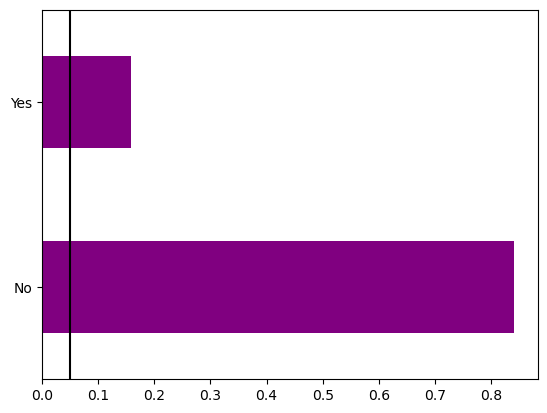

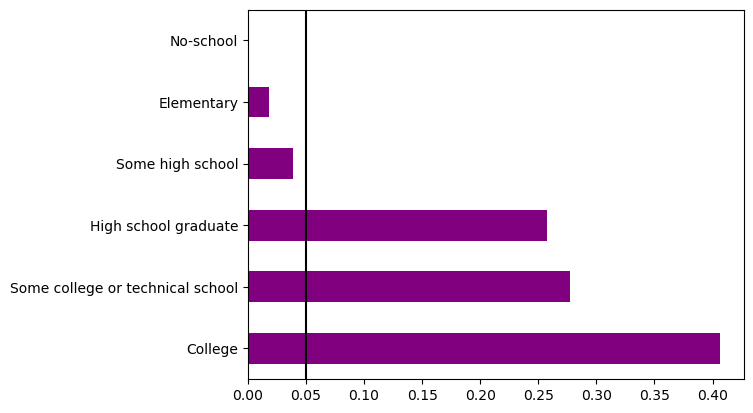

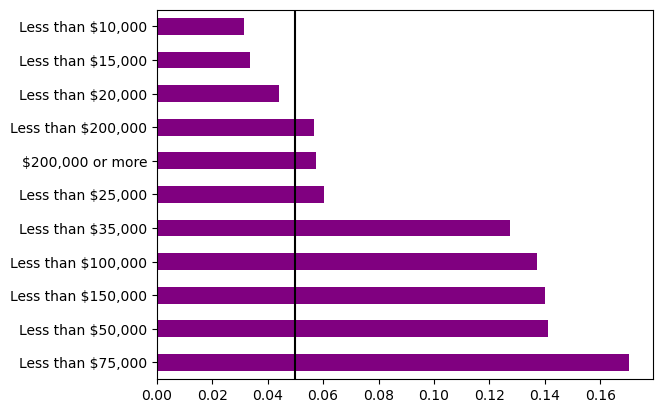

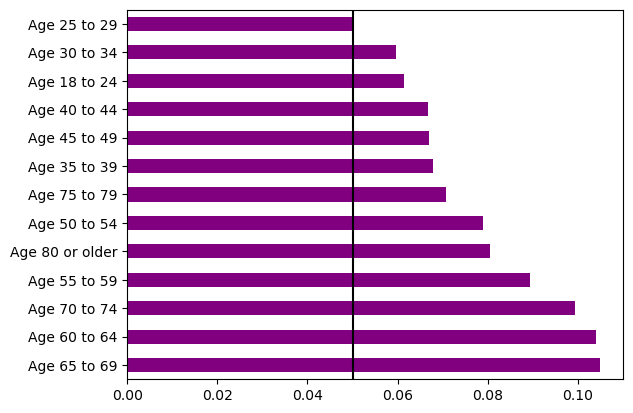

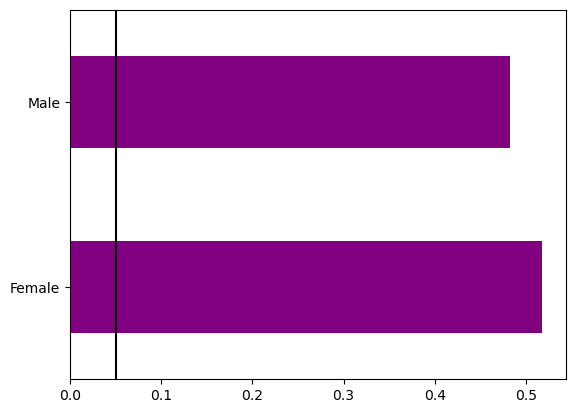

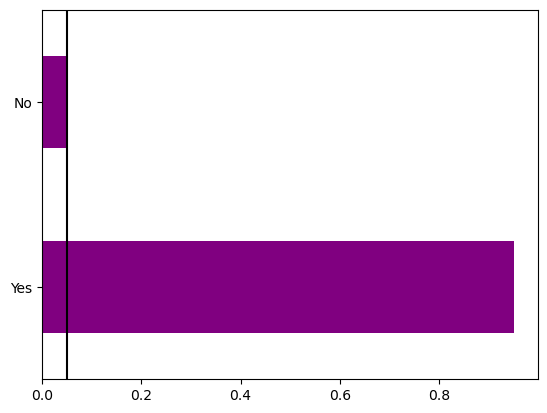

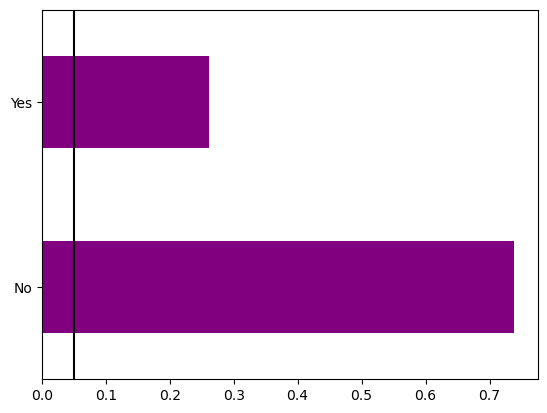

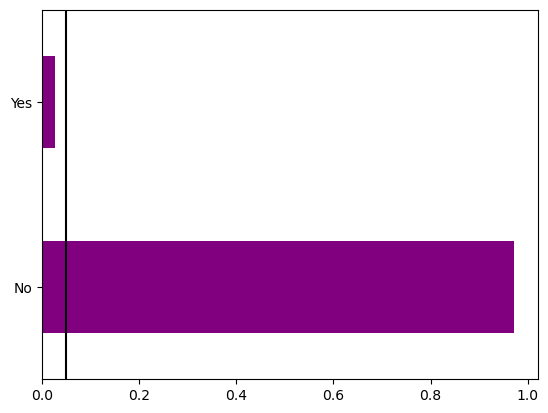

In [66]:
for column in categorical_columns:
    
    plt.figure()
    
    df[column].value_counts(sort = True, normalize = True).plot(kind = 'barh', color = 'purple')
    
    plt.axvline(x=0.05, color='black')

### Bivariate Analysis

In [67]:
df['DATE'] = pd.to_datetime(df['DATE'])

In [68]:
temp = df.set_index('DATE')[numerical_cols].resample('M').mean()

date_column = ['DATE']

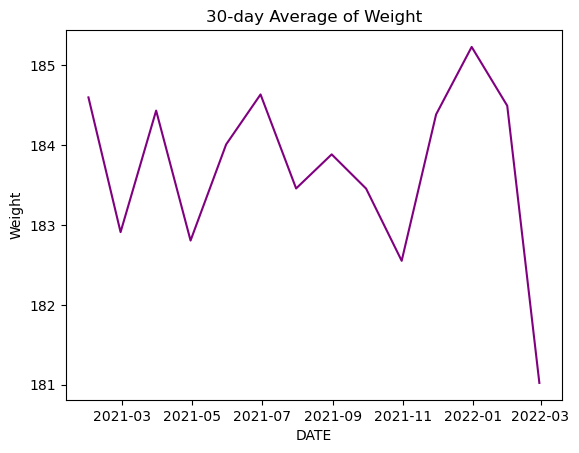

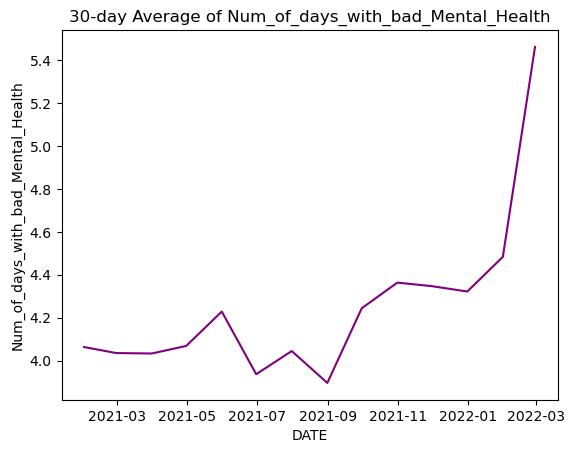

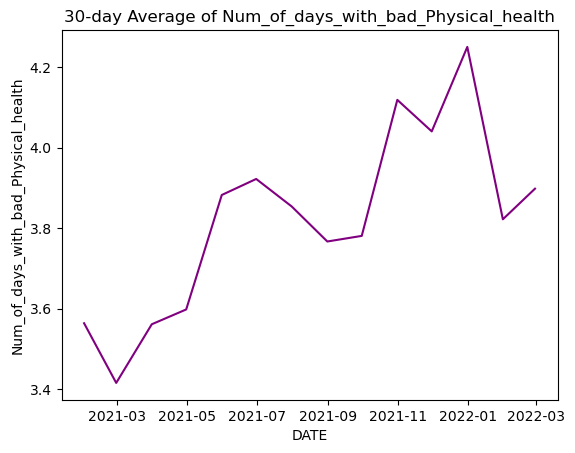

In [69]:
for num_column in numerical_cols:

    plt.figure()

    sns.lineplot(data = temp, y = num_column, x = temp.index,color = 'purple')

    plt.title(f'30-day Average of {num_column}')

#### Numerical vs Categorical

In [70]:
target = 'Diabetes_status'

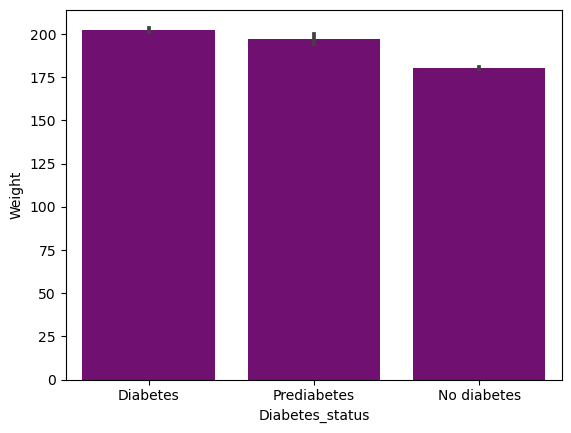

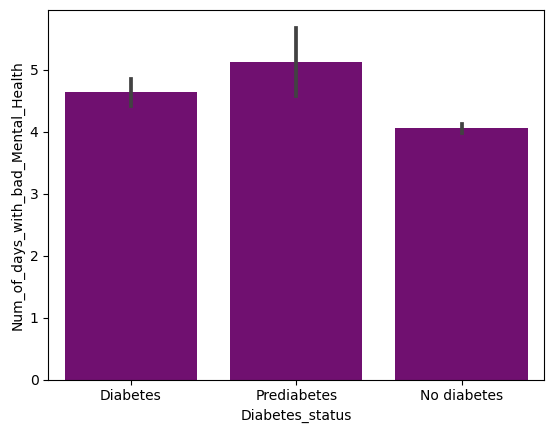

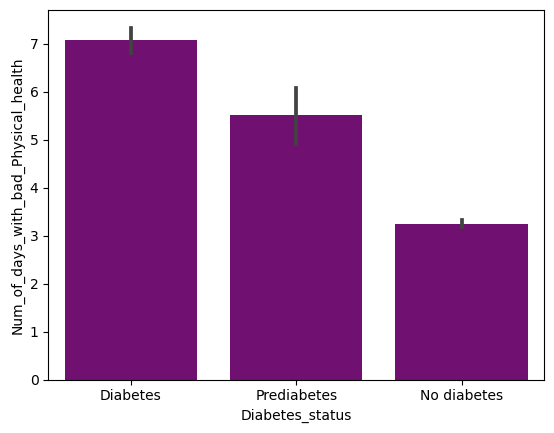

In [71]:
for column in numerical_cols:
    
    plt.figure()
    
    sns.barplot(data = df, x = target, y = column, color = 'purple')

In [72]:
for column in numerical_cols:
    print(column)
    print(df.pivot_table(index = target, values = column, aggfunc = {column: ['mean', 'median']}))
    print()

Weight
                       mean  median
Diabetes_status                    
Diabetes         202.477759   196.0
No diabetes      180.365664   175.0
Prediabetes      196.975588   190.0

Num_of_days_with_bad_Mental_Health
                     mean  median
Diabetes_status                  
Diabetes         4.632490     0.0
No diabetes      4.051451     0.0
Prediabetes      5.120536     0.0

Num_of_days_with_bad_Physical_health
                     mean  median
Diabetes_status                  
Diabetes         7.082915     0.0
No diabetes      3.246761     0.0
Prediabetes      5.509928     0.0



In [73]:
for column in numerical_cols:
    print(df.groupby(target).agg({column:['mean', 'median']}))
    print()

                     Weight       
                       mean median
Diabetes_status                   
Diabetes         202.477759  196.0
No diabetes      180.365664  175.0
Prediabetes      196.975588  190.0

                Num_of_days_with_bad_Mental_Health       
                                              mean median
Diabetes_status                                          
Diabetes                                  4.632490    0.0
No diabetes                               4.051451    0.0
Prediabetes                               5.120536    0.0

                Num_of_days_with_bad_Physical_health       
                                                mean median
Diabetes_status                                            
Diabetes                                    7.082915    0.0
No diabetes                                 3.246761    0.0
Prediabetes                                 5.509928    0.0



### Categorical vs Categorical

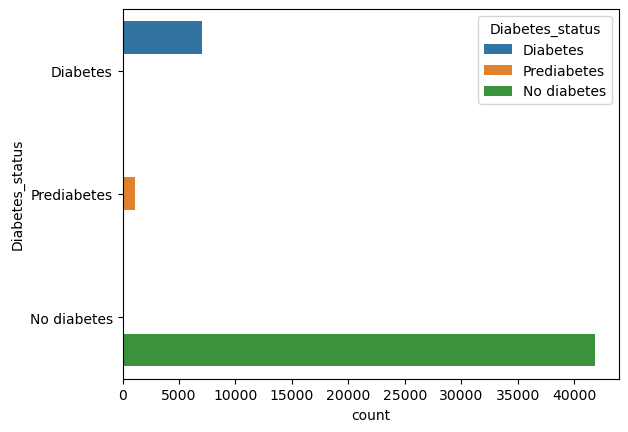

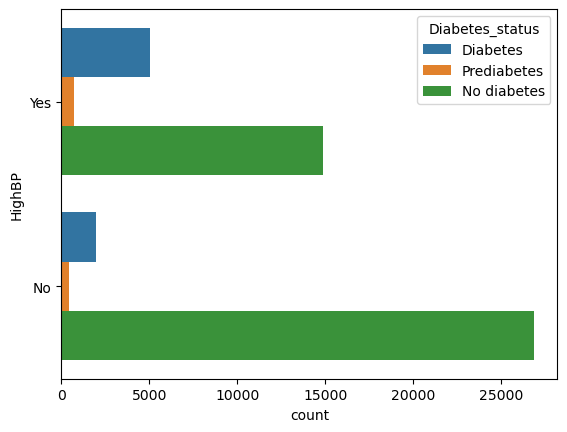

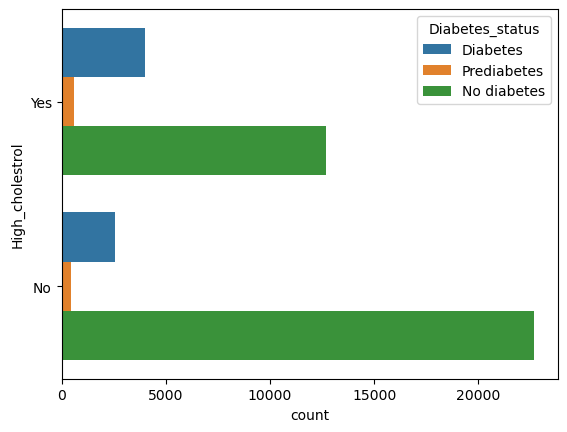

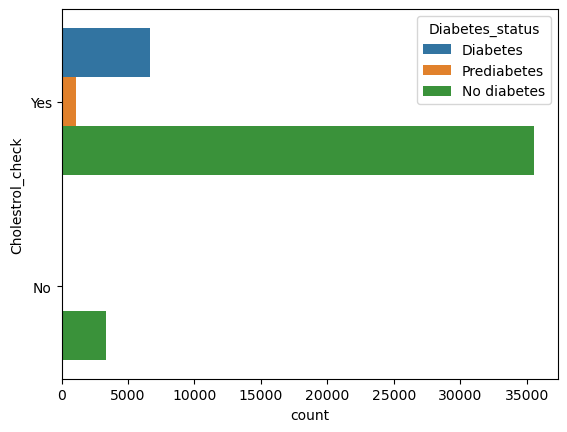

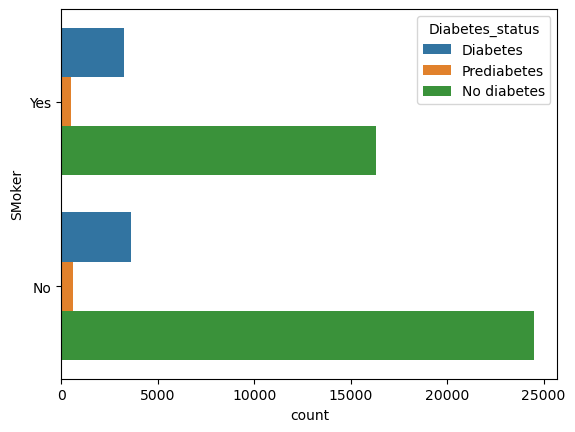

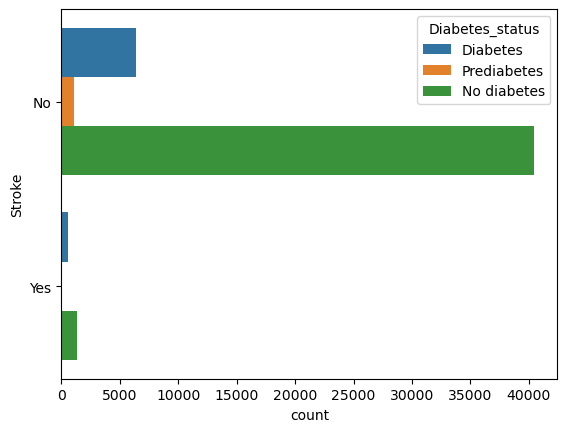

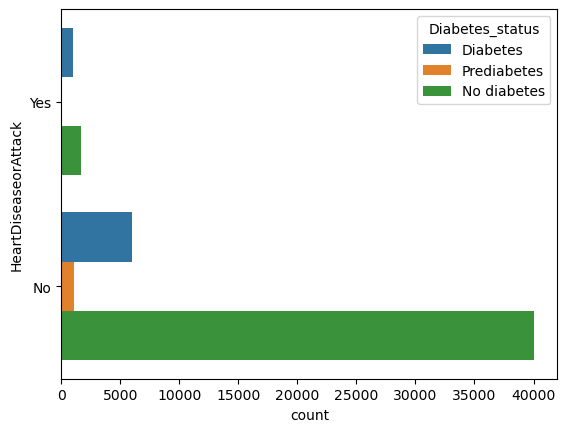

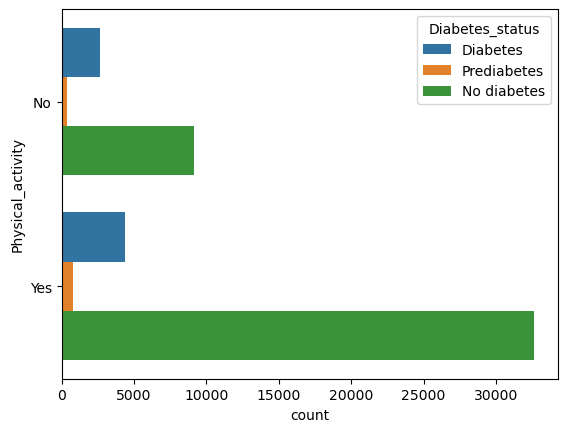

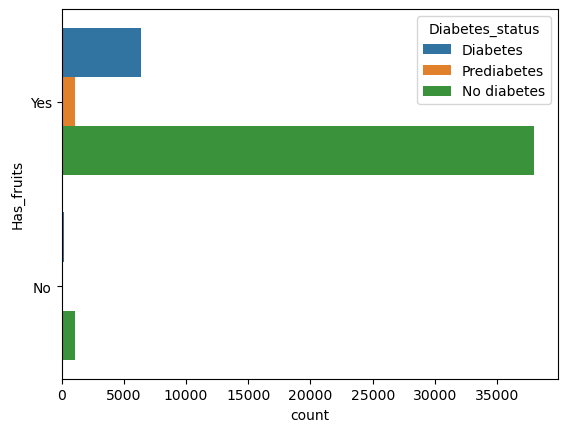

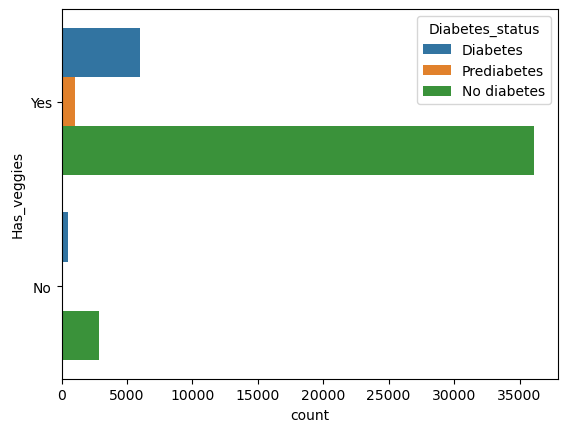

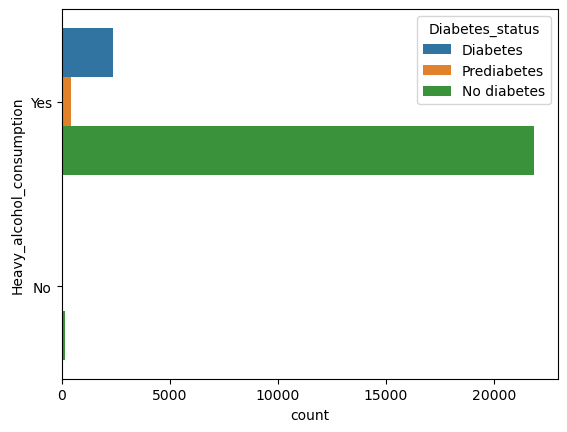

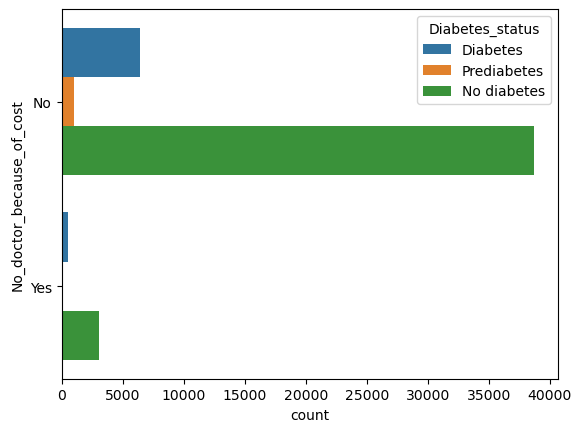

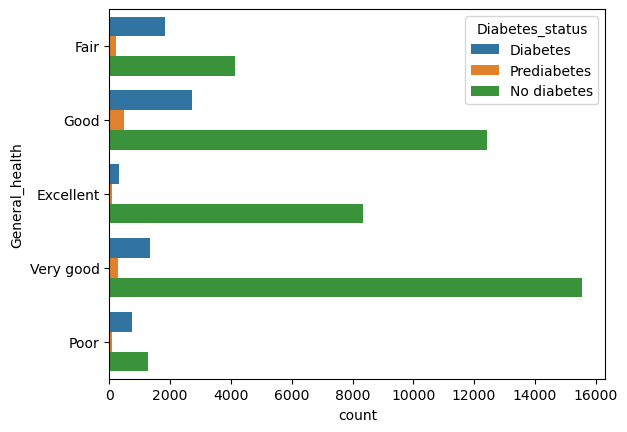

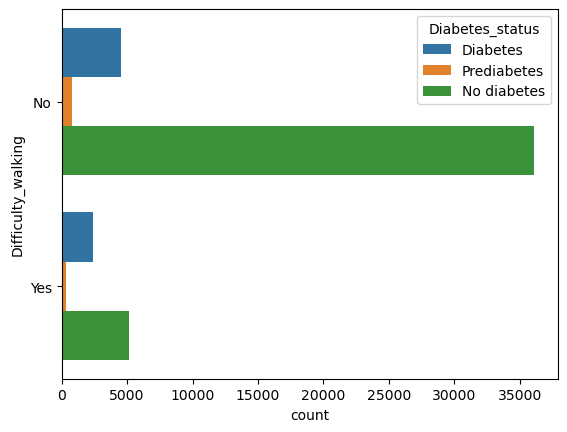

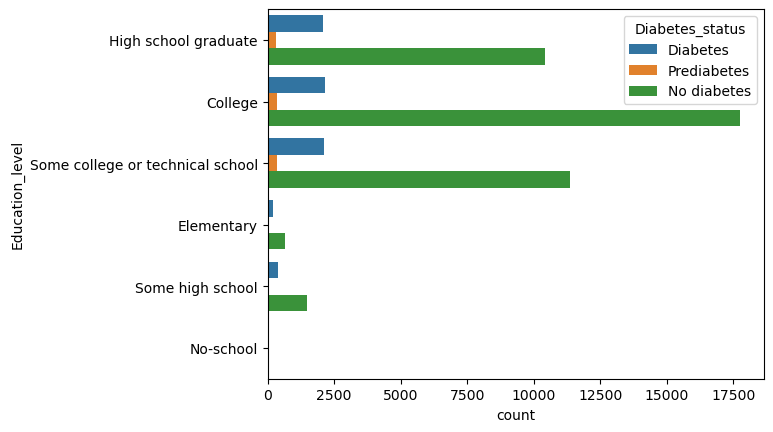

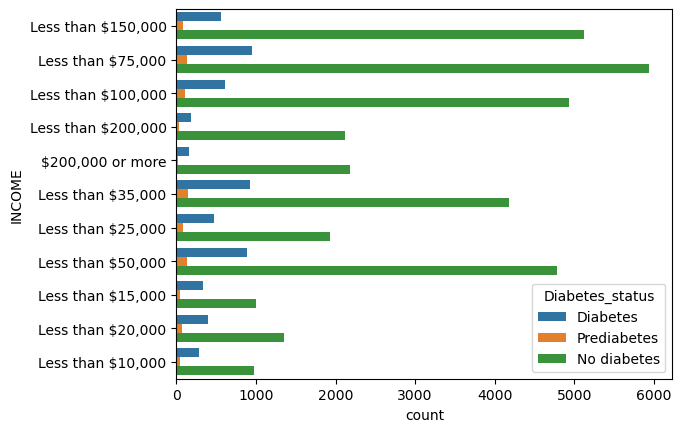

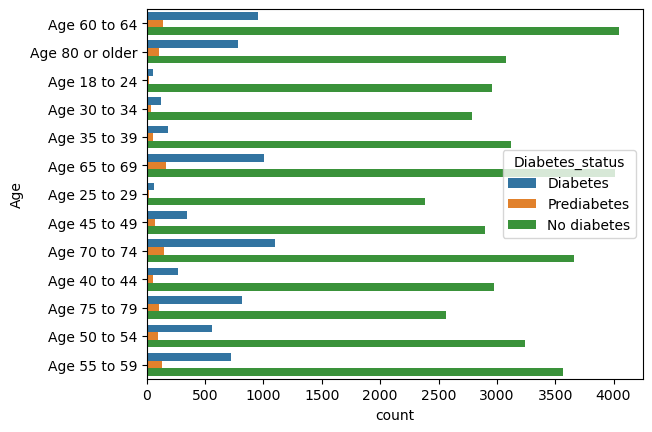

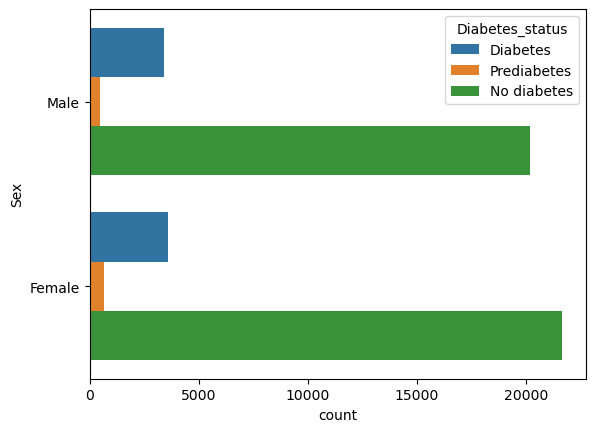

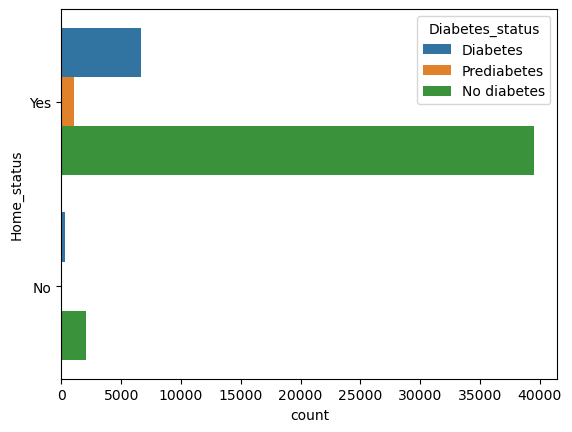

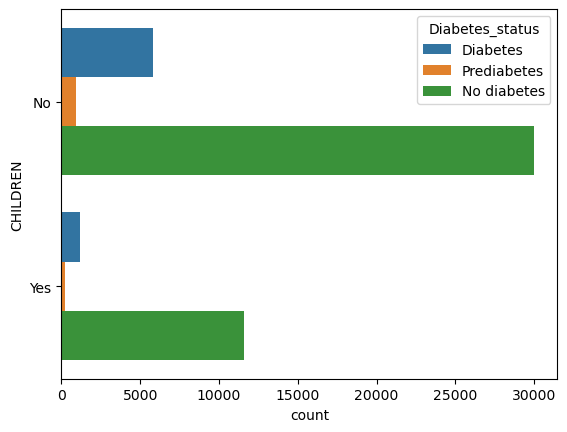

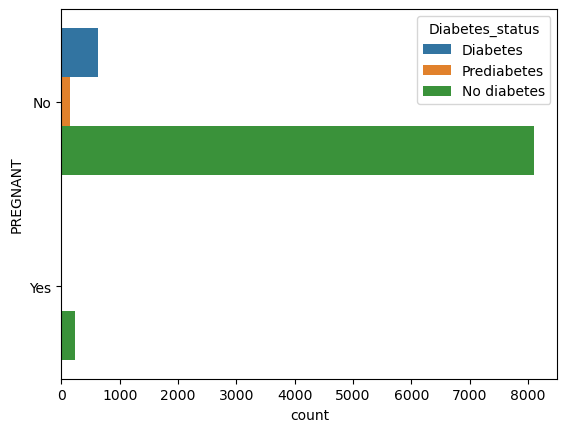

In [74]:
for column in categorical_columns:
    
    plt.figure()
    
    sns.countplot(data = df, y = column, hue = target)

In [78]:
def crosstab_(column):
    
    return pd.crosstab(df[target], df[column])

for column in categorical_columns:
    print(crosstab_(column))
    print('-------------------------------------------------')
    print()

Diabetes_status  Diabetes  No diabetes  Prediabetes
Diabetes_status                                    
Diabetes             7014            0            0
No diabetes             0        41839            0
Prediabetes             0            0         1147
-------------------------------------------------

HighBP              No    Yes
Diabetes_status              
Diabetes          1967   5021
No diabetes      26852  14868
Prediabetes        446    698
-------------------------------------------------

High_cholestrol     No    Yes
Diabetes_status              
Diabetes          2550   4026
No diabetes      22668  12682
Prediabetes        436    607
-------------------------------------------------

Cholestrol_check    No    Yes
Diabetes_status              
Diabetes           129   6639
No diabetes       3361  35540
Prediabetes         30   1057
-------------------------------------------------

SMoker              No    Yes
Diabetes_status              
Diabetes          3612   3

In [79]:
#chi-square test

values = {}

for column in categorical_columns:
    
    chi2_stat, pvalues, dof, expected = scipy.stats.chi2_contingency(crosstab_(column))
    
    values[column] = pvalues

In [80]:
values

{'Diabetes_status': 0.0,
 'HighBP': 0.0,
 'High_cholestrol': 0.0,
 'Cholestrol_check': 3.691910203538809e-90,
 'SMoker': 1.2835107220925948e-29,
 'Stroke': 6.491949149885321e-104,
 'HeartDiseaseorAttack': 2.8052727170217e-247,
 'Physical_activity': 1.036927650577066e-184,
 'Has_fruits': 0.45646072810706007,
 'Has_veggies': 0.0878800847052438,
 'Heavy_alcohol_consumption': 0.12291925219289825,
 'No_doctor_because_of_cost': 5.0607174622223445e-09,
 'General_health': 0.0,
 'Difficulty_walking': 0.0,
 'Education_level': 2.1646713650309917e-96,
 'INCOME': 6.523831699528615e-166,
 'Age': 0.0,
 'Sex': 0.0027133638509333415,
 'Home_status': 0.0059592238508452446,
 'CHILDREN': 2.5303514199075693e-89,
 'PREGNANT': 0.23535727961309705}

In [84]:
# Null Hypothesis (H0): There is no substantial relationship between the two variables

threshold = 0.05

columns_with_no_relationship_target = {column: value <= threshold for key, value in values.items()}

columns_with_no_relationship_target

{'PREGNANT': False}

### Linear Separability



In [91]:
temp = df[numerical_cols.tolist() + [target]]

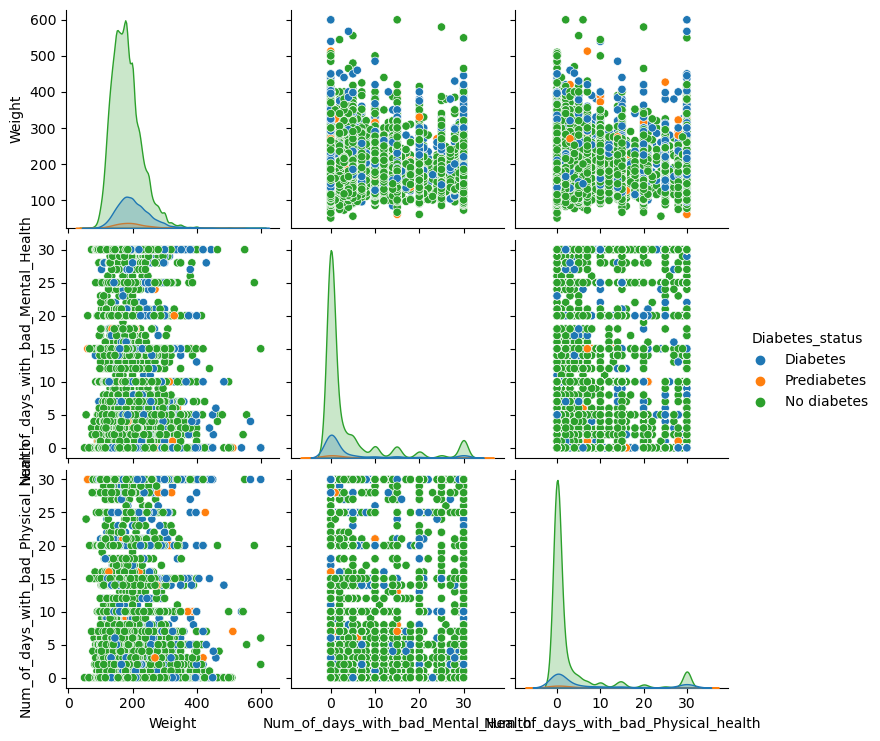

In [92]:
sns.pairplot(temp, hue = target, diag_kind = 'kde')

### Stats

In [93]:
{column: df[column].max() - df[column].min() for column in numerical_cols}

{'Weight': 550.0,
 'Num_of_days_with_bad_Mental_Health': 30.0,
 'Num_of_days_with_bad_Physical_health': 30.0}

### Correlation

<Axes: >

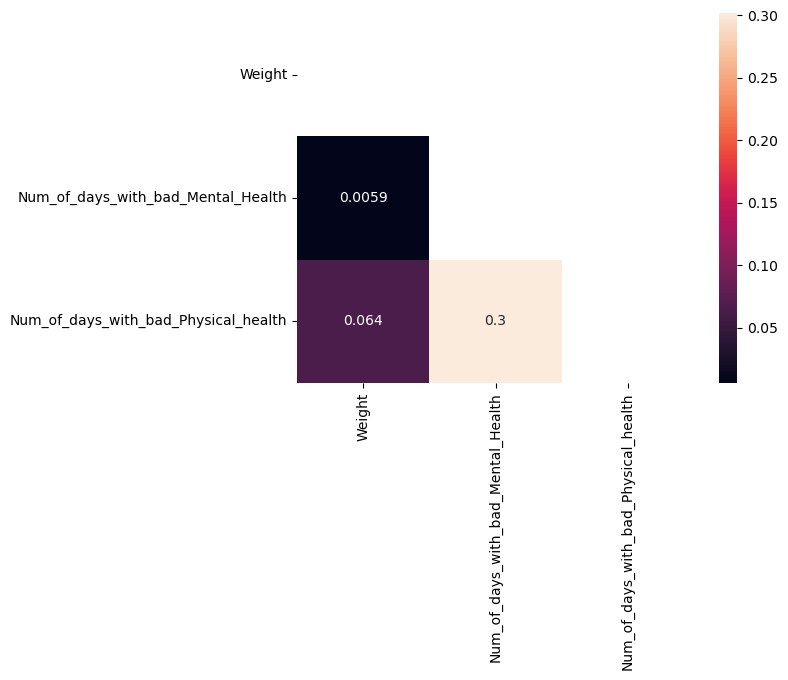

In [98]:
mask = np.triu(df.corr(method = 'spearman'))

sns.heatmap(df.corr(method = 'spearman'), mask = mask, annot = True)

<Axes: >

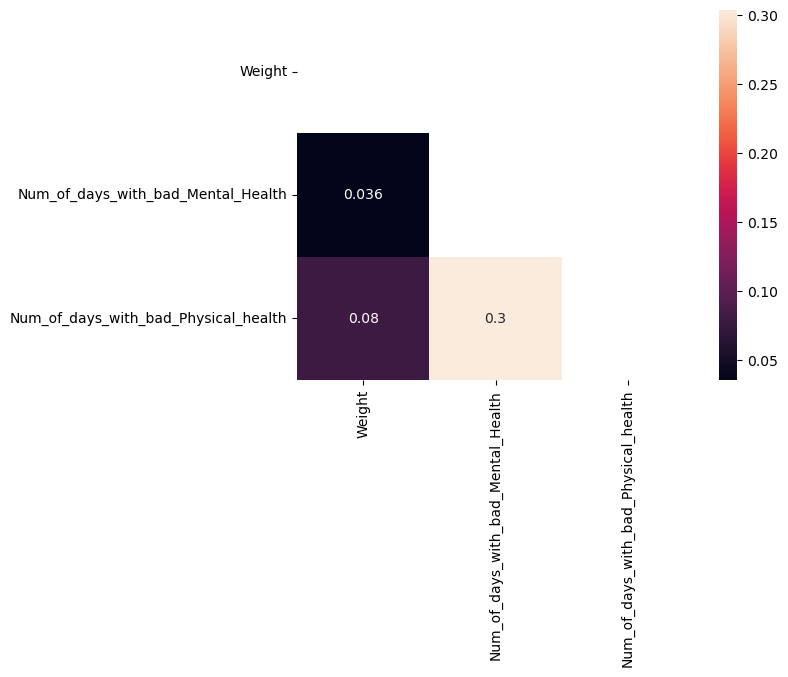

In [97]:
mask = np.triu(df.corr(method = 'pearson'))

sns.heatmap(df.corr(method = 'pearson'), mask = mask, annot = True)

### Normality

In [99]:
# The Shapiro-Wilk test tests the null hypothesis that the data was drawn from a normal distribution.

{column: scipy.stats.shapiro(df[column])[1] <= 0.05 for column in numerical_cols}

{'Weight': True,
 'Num_of_days_with_bad_Mental_Health': False,
 'Num_of_days_with_bad_Physical_health': False}

### Outliers

In [103]:
for column in numerical_cols:
    
        q3 = df[column].quantile(0.75)
        q1 = df[column].quantile(0.25)
        
        iqr = q3 - q1
        
        upper_limit = q3 + (1.5*iqr)
        lower_limit = q1 - (1.5*iqr)
        
        outliers = df.loc[np.where(df[column] > upper_limit, True,np.where( df[column] < lower_limit, True, False))]
        
        print(f'{column} contains {len(outliers)} outliers')

Weight contains 852 outliers
Num_of_days_with_bad_Mental_Health contains 6544 outliers
Num_of_days_with_bad_Physical_health contains 8196 outliers


## Data Cleaning

#### Clean duplicates

In [105]:
whole_data = [train, test, validation]

In [107]:
train = train.drop_duplicates()

test = test.drop_duplicates()

validation = validation.drop_duplicates()

#### Encode target

In [109]:
label_enc = LabelEncoder()

In [110]:
train[target] = label_enc.fit_transform(train[target])

test[target] = label_enc.transform(test[target])

validation[target] = label_enc.transform(validation[target])

#### Split data

In [156]:
xtrain, ytrain = train.drop([target], axis = 1), train[target]

xtest, ytest = test.drop([target], axis = 1), test[target]

xvalidation, yvalidation = validation.drop([target], axis = 1), validation[target]

#### Remove columns with high missing values

In [157]:
nulls = train.isnull().mean().to_dict()

In [158]:
to_drop = [column for column, null in nulls.items() if null>0.6]
to_drop

['PREGNANT']

In [159]:
xtrain = xtrain.drop(to_drop, axis = 1)

xtest = xtest.drop(to_drop, axis = 1)

xvalidation = xvalidation.drop(to_drop, axis = 1)

In [160]:
def date_convert(dataframe):
    
    for column in dataframe:
        
        dataframe[column] = pd.to_datetime(dataframe[column])
        
        dataframe[f'{column}_year'] = dataframe[column].dt.year
        dataframe[f'{column}_month'] = dataframe[column].dt.month
        dataframe[f'{column}_day'] = dataframe[column].dt.day
        
        dataframe = dataframe.drop([column], axis = 1)
        
    return dataframe

func_date_convert = FunctionTransformer(date_convert)

In [161]:
date_pipeline = Pipeline([
    ('date_convert', func_date_convert)
])

In [162]:
date_transform = ColumnTransformer([
    
    ('date_pipeline',date_pipeline, ['DATE'] )
], remainder = 'passthrough',verbose_feature_names_out = False )

In [163]:
xtrain = date_transform.fit_transform(xtrain)

xtest = date_transform.transform(xtest)

xvalidation = date_transform.transform(xvalidation)

In [164]:
xtrain[:3]

,DATE_year,DATE_month,DATE_day,HighBP,High_cholestrol,Cholestrol_check,Weight,SMoker,Stroke,HeartDiseaseorAttack,Physical_activity,Has_fruits,Has_veggies,Heavy_alcohol_consumption,No_doctor_because_of_cost,General_health,Num_of_days_with_bad_Mental_Health,Num_of_days_with_bad_Physical_health,Difficulty_walking,Education_level,INCOME,Age,Sex,Home_status,CHILDREN
419188,2021,6,10,No,No,Yes,230.0,No,No,No,Yes,Yes,Yes,NaN,No,Fair,0.0,0.0,No,College,NaN,Age 45 to 49,Male,Yes,No
348924,2021,10,24,Yes,Yes,Yes,130.0,Yes,No,No,Yes,Yes,Yes,Yes,No,Very good,0.0,0.0,No,College,"Less than $20,000",Age 60 to 64,Female,Yes,No
224574,2022,1,4,No,No,Yes,160.0,Yes,No,No,Yes,Yes,Yes,Yes,No,Good,5.0,0.0,No,College,"Less than $35,000",Age 50 to 54,Male,Yes,No


### Baseline model

In [165]:
dummy = DummyClassifier(strategy  = 'stratified')

In [166]:
xtrain_dummy = pd.get_dummies(xtrain)

In [167]:
dummy.fit(xtrain_dummy.fillna(0), ytrain)

DummyClassifier(strategy='stratified')

In [168]:
dummy_pred = dummy.predict(xtrain_dummy)

In [169]:
dummy_proba = dummy.predict_proba(xtrain)

In [170]:
baseline = pd.DataFrame({
    'accuracy': accuracy_score(ytrain, dummy_pred),
    'precision': precision_score(ytrain, dummy_pred, average='weighted'),
    'recall': recall_score(ytrain, dummy_pred, average='weighted'),
    'f1': f1_score(ytrain, dummy_pred, average='weighted'),
    'roc_auc': roc_auc_score(ytrain, dummy_proba, multi_class='ovo'),  # Specify 'ovo' or 'ovr'
}, index=['Baseline'])

baseline


,accuracy,precision,recall,f1,roc_auc
Baseline,0.720691,0.719564,0.720691,0.720126,0.499704


## Model Building

In [257]:
models = []

models.append( ('KNN',KNeighborsClassifier()) )
models.append( ('LogReg',LogisticRegression()) )
models.append( ('Tree', DecisionTreeClassifier()) )
models.append( ('Xgboost', xgb.XGBClassifier()) )
models.append( ('Forest', RandomForestClassifier()) )
models.append( ('Adaboost', AdaBoostClassifier()) )

In [269]:
import sklearn.metrics as metrics
scoring_metrics = sorted(metrics.SCORERS.keys())
scoring_metrics

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'matthews_corrcoef',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_negative_likelihood_ratio',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'positive_likelihood_ratio',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',

In [273]:
def evaluate_model(xtrain, ytrain, experiment_number):
    
    names, accuracy, precision, recall, f1, roc_auc = [], [], [], [], [], []
    
    for name, model in models:
        
        names.append(name)
        
        cv = KFold(shuffle = True, n_splits = 3)
        
        
        acc  = cross_val_score(model, xtrain, ytrain, cv = cv, scoring = 'accuracy')
        accuracy.append(acc.mean())
        print(f'{name} | accuracy std = {acc.std()}')
         
            
        prec =  cross_val_score(model, xtrain, ytrain, cv = cv, scoring = 'precision_macro')
        precision.append(prec.mean())
        print(f'{name} |  precision std = {prec.std()}')
        
        
        
        rec = cross_val_score(model, xtrain, ytrain, cv = cv, scoring = 'recall_macro')
        recall.append(rec.mean())
        print(f'{name} | recall std = {rec.std()}')
        
        
        
        f1_ = cross_val_score(model, xtrain, ytrain, cv = cv, scoring = 'f1_macro')
        f1.append(f1_.mean())
        print(f'{name} |f1 std = {f1_.std()}')
        
        
        
        yproba = cross_val_predict(model, xtrain, ytrain, cv=cv, method = 'predict_proba')
        auc = cross_val_score(model, xtrain, ytrain, cv = cv, scoring = 'roc_auc_ovr_weighted')
        roc_auc.append(auc.mean())
        print(f'{name} | roc_auc std = {auc.std()}')
        
        
        #fpr, tpr, thresh = roc_curve(ytrain, yproba)
        
        #plt.plot(fpr, tpr, label = f'{name}: {auc.mean()}')
        #plt.xlabel('False positive rate'); plt.ylabel('False positive rate'); plt.legend();plt.show();
        
        ypred_class = cross_val_predict(model, xtrain, ytrain, cv= cv)
        cm = confusion_matrix(ytrain, ypred_class)
        
        ConfusionMatrixDisplay(cm).plot();plt.show();
        
    return pd.DataFrame({
        'names':names,
        'accuracy': accuracy,
        'precision':precision ,
        'recall': recall,
        'f1': f1,
        'roc_auc': roc_auc
        })        

## Feature Engineering - Experiment 0

1. Missing values: Drop
2. Encoding: One-Hot
3. Transformation: None
4. Outliers: None
5. Scaling: Robust Scaler
6. Sampling: OverSampling
7. Feature Selection: RFE(Elastic Net)

In [197]:
xtrain_0, ytrain_0 = xtrain.copy(), ytrain.copy()

In [210]:
print(f'Shape of training set before dropping null values: {xtrain.shape[0]}')

Shape of training set before dropping null values: 253501


In [208]:
temp = pd.concat([xtrain_0, ytrain_0], axis = 1)

temp = temp.dropna()

xtrain_0, ytrain_0 = temp.drop([target], axis = 1), temp[target]

In [211]:
print(f'Shape of training set before dropping null values: {xtrain_0.shape[0]}')

Shape of training set before dropping null values: 86453


In [212]:
one_hot = OneHotEncoder()

scaler = RobustScaler()

In [214]:
num_columns_0 = xtrain_0.select_dtypes('number').columns.tolist()
cat_columns_0 = xtrain_0.select_dtypes('O').columns.tolist()

num_pipeline = Pipeline([
    ('scaler', scaler)
])


cat_pipeline = Pipeline([
    ('one_hot', one_hot)
])

preprocessing_pipeline_0 = ColumnTransformer([
    
    ('num', num_pipeline, num_columns_0),
    ('cat', cat_pipeline, cat_columns_0),

], verbose_feature_names_out = False, remainder = 'passthrough')

In [215]:
xtrain_0 = preprocessing_pipeline_0.fit_transform(xtrain_0)

In [216]:
xtrain_0[:1]

,DATE_year,DATE_month,DATE_day,Weight,Num_of_days_with_bad_Mental_Health,Num_of_days_with_bad_Physical_health,HighBP_1,HighBP_2,High_cholestrol_1,High_cholestrol_2,Cholestrol_check_1,SMoker_1,SMoker_2,Stroke_1,Stroke_2,HeartDiseaseorAttack_1,HeartDiseaseorAttack_2,Physical_activity_1,Physical_activity_2,Has_fruits_1,Has_fruits_2,Has_veggies_1,Has_veggies_2,Heavy_alcohol_consumption_1,Heavy_alcohol_consumption_2,No_doctor_because_of_cost_1,No_doctor_because_of_cost_2,General_health_1,General_health_2,General_health_3,General_health_4,General_health_5,Difficulty_walking_1,Difficulty_walking_2,Education_level_1,Education_level_2,Education_level_3,Education_level_4,Education_level_5,Education_level_6,INCOME_1,INCOME_2,INCOME_3,INCOME_4,INCOME_5,INCOME_6,INCOME_7,INCOME_8,INCOME_9,INCOME_10,INCOME_11,Age_1,Age_2,Age_3,Age_4,Age_5,Age_6,Age_7,Age_8,Age_9,Age_10,Age_11,Age_12,Age_13,Sex_1,Sex_2,Home_status_1,Home_status_2,CHILDREN_1,CHILDREN_2
348924,0.0,0.5,0.642857,-0.877193,0.0,0.0,1,0,1,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0


In [219]:
over_sampler  = RandomOverSampler()

xtrain_0, ytrain_0 = over_sampler.fit_resample(xtrain_0, ytrain_0)

In [243]:
selector = RFE(estimator = ElasticNet()).fit(xtrain_0, ytrain_0)

selected_columns_0 = xtrain_0.columns[selector.get_support()]
selected_columns_0
# selector.estimator_.coef_

Index(['Education_level_2', 'Education_level_3', 'Education_level_4',
       'Education_level_5', 'Education_level_6', 'INCOME_1', 'INCOME_2',
       'INCOME_3', 'INCOME_4', 'INCOME_5', 'INCOME_6', 'INCOME_7', 'INCOME_8',
       'INCOME_9', 'INCOME_10', 'INCOME_11', 'Age_1', 'Age_2', 'Age_3',
       'Age_4', 'Age_5', 'Age_6', 'Age_7', 'Age_8', 'Age_9', 'Age_10',
       'Age_11', 'Age_12', 'Age_13', 'Sex_1', 'Sex_2', 'Home_status_1',
       'Home_status_2', 'CHILDREN_1', 'CHILDREN_2'],
      dtype='object')

In [244]:
f'{len(selected_columns_0)} selected from {len(xtrain_0.columns)}'

'35 selected from 70'

In [249]:
xtrain_0 = xtrain_0[selected_columns_0]

KNN | accuracy std = 0.0022771225819179283
KNN |  precision std = 0.007384593203747319
KNN | recall std = 0.007558491983076809
KNN |f1 std = 0.0016104637485948705
KNN | roc_auc std = 0.0014887352527437527


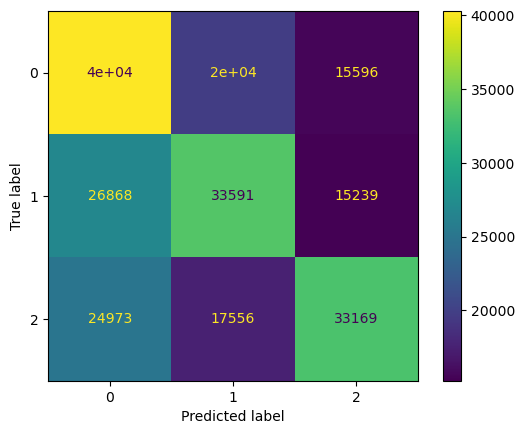

LogReg | accuracy std = 0.0002184934208751406
LogReg |  precision std = 0.0014505228544918055
LogReg | recall std = 0.001742330983225028
LogReg |f1 std = 0.0017914540680807282
LogReg | roc_auc std = 0.0008294203713496262


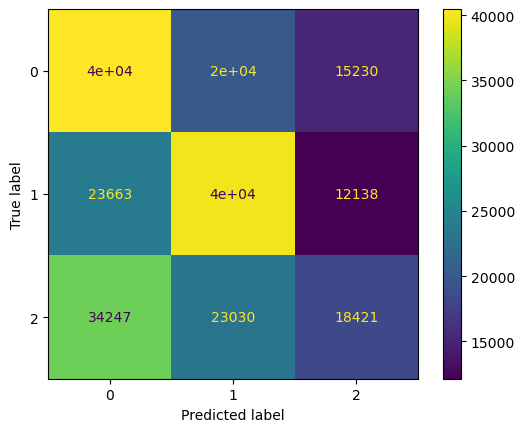

Tree | accuracy std = 0.0012232277766567067
Tree |  precision std = 9.422501708473654e-05
Tree | recall std = 0.0012336140324212097
Tree |f1 std = 0.001584169900730005
Tree | roc_auc std = 0.0012688965120544486


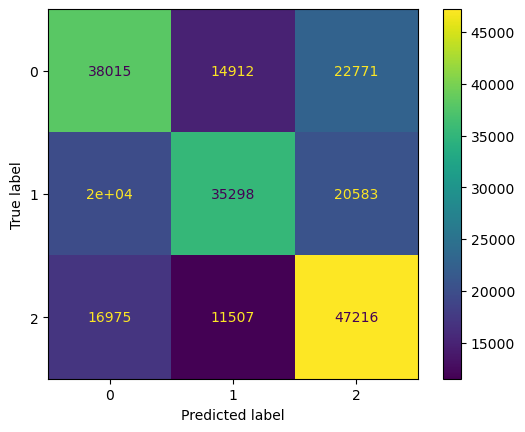

Xgboost | accuracy std = 0.0015206044251198623
Xgboost |  precision std = 0.0032356199350105416
Xgboost | recall std = 0.0010246559296562723
Xgboost |f1 std = 0.0013450863232679353
Xgboost | roc_auc std = 0.0011259156977181384


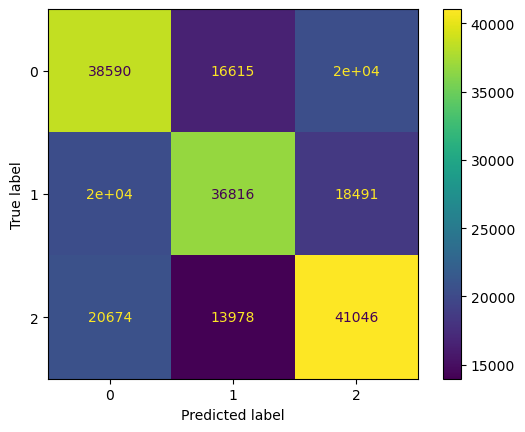

Forest | accuracy std = 0.0015676204170966444
Forest |  precision std = 0.0011125364700163396
Forest | recall std = 0.0010396723199863715
Forest |f1 std = 0.0011877432138916503
Forest | roc_auc std = 0.001284162723468641


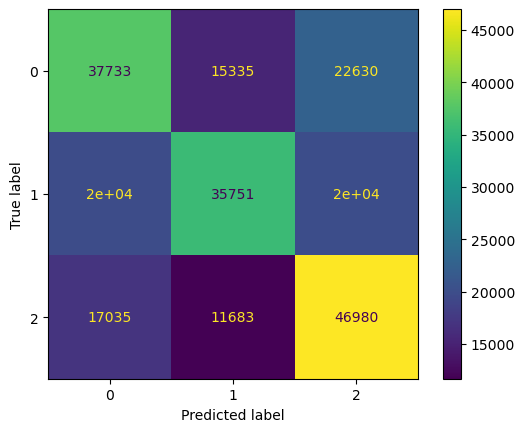

Adaboost | accuracy std = 0.0006158869008893091
Adaboost |  precision std = 0.0009029358441052913
Adaboost | recall std = 0.002198247398971337
Adaboost |f1 std = 0.0011818049918038984
Adaboost | roc_auc std = 0.000992605934353989


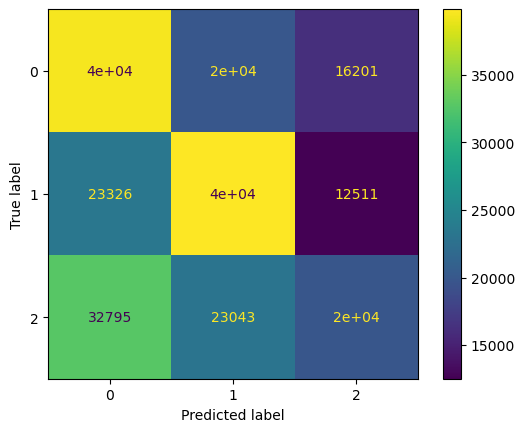

,names,accuracy,precision,recall,f1,roc_auc
0,KNN,0.470726,0.478048,0.470299,0.471074,0.665995
1,LogReg,0.434758,0.432247,0.434435,0.423622,0.620104
2,Tree,0.530727,0.533574,0.529841,0.528210,0.729604
3,Xgboost,0.513453,0.513388,0.512286,0.512728,0.708940
4,Forest,0.531102,0.533921,0.531600,0.529259,0.730558
5,Adaboost,0.434974,0.432059,0.435560,0.426718,0.617811


In [274]:
metrics_0 = evaluate_model(xtrain_0, ytrain_0, 0)
metrics_0

## Feature Engineering - Experiment 1

1. Missing values: SimpleImputer
2. Encoding: Count
3. Transformation: Log
4. Outliers: Winsorize Q95 - Q5
5. Scaling: Standard scaler
6. Sampling: Undersampling
7. Feature Selection: f classif 

In [299]:
xtrain_1, ytrain_1 = xtrain.copy(), ytrain.copy()

In [300]:
num_imputer = SimpleImputer(strategy = 'median')

cat_imputer = SimpleImputer(strategy = 'most_frequent')

scaler = StandardScaler()

In [301]:
def count_encoder(dataframe):
    
    for column in dataframe:
        
        mapping = dataframe[column].value_counts(normalize = True).to_dict()
        
        dataframe[column] = dataframe[column].map(mapping)
        
    return dataframe

func_count_encoder = FunctionTransformer(count_encoder)

In [302]:
def log_transformer(dataframe):
    
    for column in dataframe:
        
        if 0 in dataframe[column]:
            
            dataframe[column] = dataframe[column].apply(np.log1p)
            
        dataframe[column] = dataframe[column].apply(np.log)
        
    return dataframe
    
func_log_transformer = FunctionTransformer(log_transformer)    

In [303]:
def winsorize(dataframe):
    
    for column in dataframe:
        
        up = dataframe[column].quantile(0.95)
        low = dataframe[column].quantile(0.05)
        
        dataframe[column] = np.where(dataframe[column] > up, up, np.where(dataframe[column] < low, low, dataframe[column]))
        
    return dataframe
    
func_winsorize = FunctionTransformer(winsorize)    

In [306]:
num_columns_1 = xtrain_1.select_dtypes('number').columns.tolist()
cat_columns_1 = xtrain_1.select_dtypes('O').columns.tolist()

num_pipeline = Pipeline([
    
    ('imputer', num_imputer),
    ('scaler', scaler),
    ('func_log_transformer', func_log_transformer),
    ('func_winsorize', func_winsorize),
    ('imputer_2', num_imputer),

])


cat_pipeline = Pipeline([
    ('cat_imputer', cat_imputer),
    ('count_encoder', func_count_encoder)
])

preprocessing_pipeline_1 = ColumnTransformer([
    
    ('num', num_pipeline, num_columns_1),
    ('cat', cat_pipeline, cat_columns_1),

], verbose_feature_names_out = False, remainder = 'passthrough')

In [307]:
xtrain_1 = preprocessing_pipeline_1.fit_transform(xtrain_1)

In [308]:
under_sampler = RandomUnderSampler()

xtrain_1, ytrain_1 = under_sampler.fit_resample(xtrain_1, ytrain_1)

In [309]:
f_statistic, pvalues = f_classif(xtrain_1, ytrain_1)

values = {column: pvalue for column, pvalue in zip(xtrain_1.columns, pvalues)}

In [312]:
selected_columns_1 = [column for column, pvalue in values.items() if pvalue < 0.05]
selected_columns_1

['Weight',
 'Num_of_days_with_bad_Mental_Health',
 'Num_of_days_with_bad_Physical_health',
 'HighBP',
 'High_cholestrol',
 'Cholestrol_check',
 'SMoker',
 'Stroke',
 'HeartDiseaseorAttack',
 'Physical_activity',
 'Has_fruits',
 'No_doctor_because_of_cost',
 'General_health',
 'Difficulty_walking',
 'Education_level',
 'Age',
 'Home_status',
 'CHILDREN']

In [315]:
xtrain_1.shape

(17517, 18)

In [316]:
xtrain_1[:5]

,Weight,Num_of_days_with_bad_Mental_Health,Num_of_days_with_bad_Physical_health,HighBP,High_cholestrol,Cholestrol_check,SMoker,Stroke,HeartDiseaseorAttack,Physical_activity,Has_fruits,No_doctor_because_of_cost,General_health,Difficulty_walking,Education_level,Age,Home_status,CHILDREN
0,-0.812883,-0.501961,-0.45243,0.413308,0.345624,0.928052,0.600649,0.959941,0.946083,0.760265,0.974087,0.925811,0.311352,0.157846,0.254173,0.080757,0.951543,0.741985
1,1.938693,3.180438,3.14872,0.413308,0.345624,0.928052,0.399351,0.959941,0.946083,0.239735,0.974087,0.925811,0.041629,0.157846,0.254173,0.101396,0.951543,0.741985
2,0.562905,-0.501961,-0.45243,0.586692,0.654376,0.928052,0.399351,0.959941,0.946083,0.239735,0.974087,0.925811,0.311352,0.157846,0.275845,0.098816,0.951543,0.741985
3,1.324880,-0.501961,-0.45243,0.413308,0.345624,0.928052,0.399351,0.959941,0.946083,0.760265,0.974087,0.925811,0.311352,0.842154,0.275845,0.101396,0.951543,0.741985
4,0.076088,-0.501961,3.14872,0.413308,0.345624,0.928052,0.600649,0.959941,0.946083,0.239735,0.974087,0.925811,0.041629,0.157846,0.411253,0.080757,0.951543,0.741985


In [313]:
xtrain_1 = xtrain_1[selected_columns_1]

KNN | accuracy std = 0.006438993188145692
KNN |  precision std = 0.004577718364188654
KNN | recall std = 0.003887117765886911
KNN |f1 std = 0.00761151284290678
KNN | roc_auc std = 0.0027891373004054554


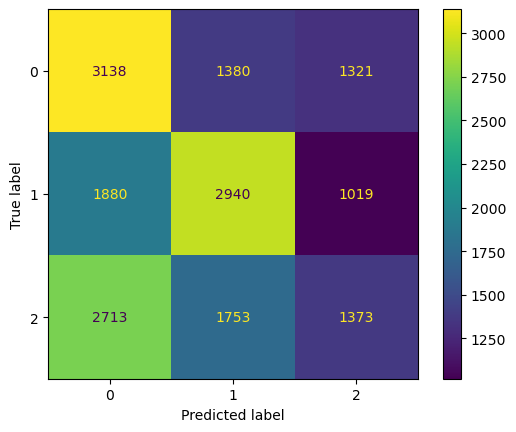

LogReg | accuracy std = 0.004141099750715789
LogReg |  precision std = 0.007169846773115514
LogReg | recall std = 0.002756913099497082
LogReg |f1 std = 0.004676266531284398
LogReg | roc_auc std = 0.004283004795138878


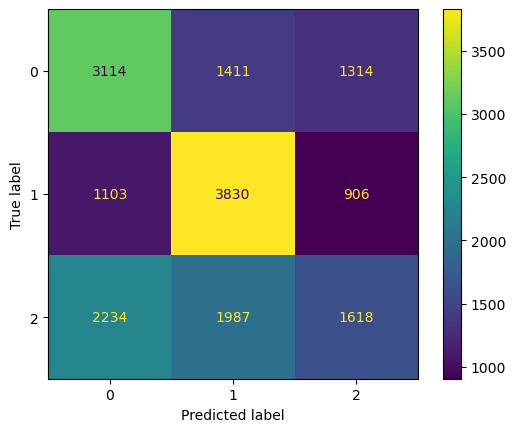

Tree | accuracy std = 0.003975677421129221
Tree |  precision std = 0.001491237963784887
Tree | recall std = 0.001714464686339343
Tree |f1 std = 0.006390923429475437
Tree | roc_auc std = 0.001524023631927328


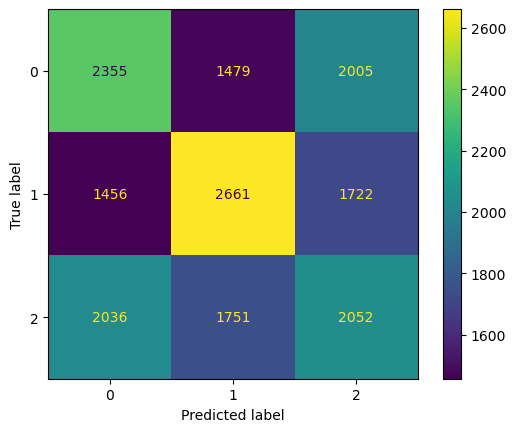

Xgboost | accuracy std = 0.008671273640941954
Xgboost |  precision std = 0.005023318899401826
Xgboost | recall std = 0.00237258860297341
Xgboost |f1 std = 0.005999691916322277
Xgboost | roc_auc std = 0.0033746904602233664


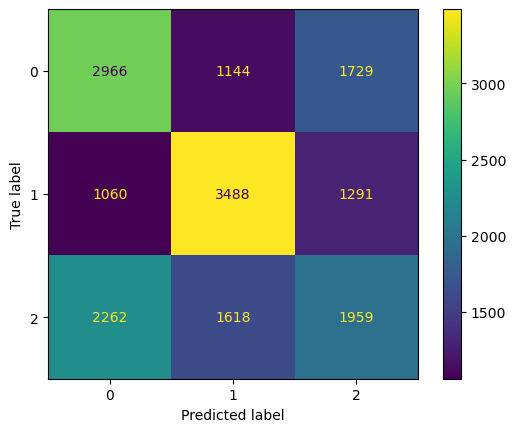

Forest | accuracy std = 0.005093911045545301
Forest |  precision std = 0.004722802603378451
Forest | recall std = 0.005738263772460804
Forest |f1 std = 0.0039444312803273915
Forest | roc_auc std = 0.003744044027595799


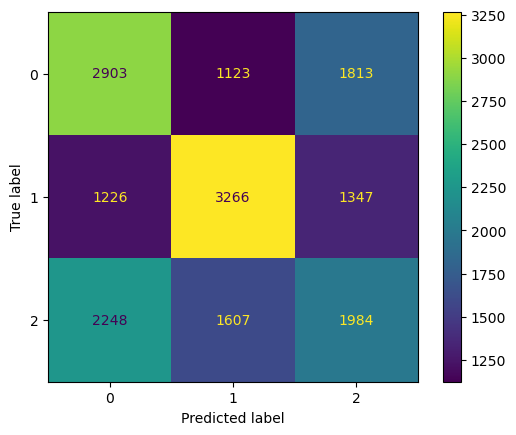

Adaboost | accuracy std = 0.004553413621649644
Adaboost |  precision std = 0.00392836046190876
Adaboost | recall std = 0.006090675480015169
Adaboost |f1 std = 0.0047637736804742375
Adaboost | roc_auc std = 0.0026557141625962147


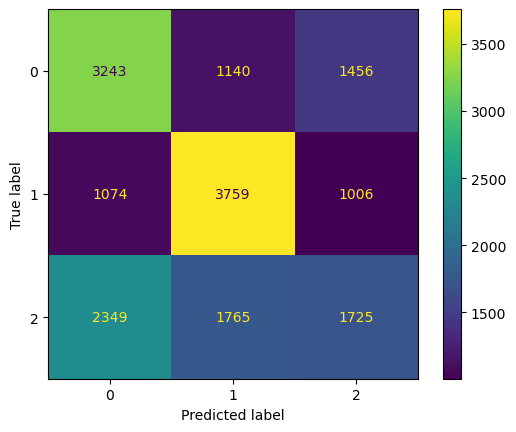

In [314]:
metrics_1 = evaluate_model(xtrain_1, ytrain_1, 1)

In [317]:
metrics_1

,names,accuracy,precision,recall,f1,roc_auc
0,KNN,0.418279,0.414024,0.418309,0.408995,0.597225
1,LogReg,0.488269,0.478266,0.488161,0.473974,0.673896
2,Tree,0.400639,0.405316,0.405009,0.404011,0.549800
3,Xgboost,0.474282,0.471618,0.478362,0.473840,0.663260
4,Forest,0.463436,0.455420,0.462888,0.468023,0.642415
5,Adaboost,0.498773,0.489201,0.501230,0.488894,0.680685


## Feature Engineering - Experiment 2

1. Missing values: Fill with values at the end of the distribution
2. Encoding: Ordinal
3. Transformation: Poly
4. Outliers: Winsorize q90 - q10
5. Scaling: MinMaxScaler
6. Sampling: ADASYN
7. Feature Selection: Tree-based feature importance

In [332]:
xtrain_2, ytrain_2 = xtrain.copy(), ytrain.copy()

In [333]:
def end_of_dist_imputer(dataframe):
    
    for column in dataframe:
        
        upper_limit = dataframe[column].quantile(0.75)
        
        dataframe[column] = dataframe[column].fillna(upper_limit)
        
    return dataframe

func_end_of_dist_imputer = FunctionTransformer(end_of_dist_imputer)
mode_imputer = SimpleImputer(strategy = 'most_frequent')

In [334]:
encoder = OrdinalEncoder()

In [335]:
poly_transformer = PolynomialFeatures(degree = 3)

In [336]:
def winsorize(dataframe):
    
    for column in dataframe:
        
        up = dataframe[column].quantile(0.90)
        low = dataframe[column].quantile(0.10)
        
        dataframe[column] = np.where(dataframe[column] > up, up, np.where(dataframe[column] < low, low, dataframe[column]))
        
    return dataframe
    
func_winsorize = FunctionTransformer(winsorize)    

In [337]:
scaler = MinMaxScaler()

In [338]:
num_columns_2 = xtrain_2.select_dtypes('number').columns.tolist()
cat_columns_2 = xtrain_2.select_dtypes('O').columns.tolist()

num_pipeline = Pipeline([
    
    ('imputer', func_end_of_dist_imputer),
    ('scaler', scaler),
    ('func_log_transformer', poly_transformer),
    ('func_winsorize', func_winsorize)
])


cat_pipeline = Pipeline([
    ('cat_imputer', mode_imputer),
    ('encoder', encoder)
])

preprocessing_pipeline_2 = ColumnTransformer([
    
    ('num', num_pipeline, num_columns_2),
    ('cat', cat_pipeline, cat_columns_2),

], verbose_feature_names_out = False, remainder = 'passthrough')

In [339]:
xtrain_2 = preprocessing_pipeline_2.fit_transform(xtrain_2)

In [340]:
adasyn = ADASYN()

xtrain_2, ytrain_2 = adasyn.fit_resample(xtrain_2, ytrain_2)

In [341]:
model  = RandomForestClassifier()
model.fit(xtrain_2, ytrain_2)

[]

In [343]:
selected_columns_2 = [column for column,importances in zip(xtrain_2.columns, model.feature_importances_)  if importances > 0.01]
selected_columns_2

['DATE_month',
 'DATE_day',
 'Weight',
 'Num_of_days_with_bad_Mental_Health',
 'Num_of_days_with_bad_Physical_health',
 'DATE_month^2',
 'DATE_month DATE_day',
 'DATE_month Weight',
 'DATE_day^2',
 'DATE_day Weight',
 'DATE_day Num_of_days_with_bad_Physical_health',
 'Weight^2',
 'Weight Num_of_days_with_bad_Physical_health',
 'Num_of_days_with_bad_Mental_Health^2',
 'Num_of_days_with_bad_Physical_health^2',
 'DATE_month^3',
 'DATE_month^2 DATE_day',
 'DATE_month^2 Weight',
 'DATE_month DATE_day^2',
 'DATE_month DATE_day Weight',
 'DATE_month Weight^2',
 'DATE_day^3',
 'DATE_day^2 Weight',
 'DATE_day Weight^2',
 'DATE_day Weight Num_of_days_with_bad_Physical_health',
 'Weight^3',
 'Weight^2 Num_of_days_with_bad_Physical_health',
 'Weight Num_of_days_with_bad_Physical_health^2',
 'Num_of_days_with_bad_Mental_Health^3',
 'Num_of_days_with_bad_Physical_health^3',
 'HighBP',
 'General_health',
 'Education_level',
 'INCOME',
 'Age',
 'CHILDREN']

In [345]:
print(f'{len(selected_columns_2)} selected out of {len(xtrain_2.columns)}')

36 selected out of 103


In [346]:
xtrain_2 = xtrain_2[selected_columns_2]

KNN | accuracy std = 0.0006413601427975717
KNN |  precision std = 0.00011547603393991937
KNN | recall std = 0.000979520511434469
KNN |f1 std = 0.0008413673595161362
KNN | roc_auc std = 0.0005298525435799292


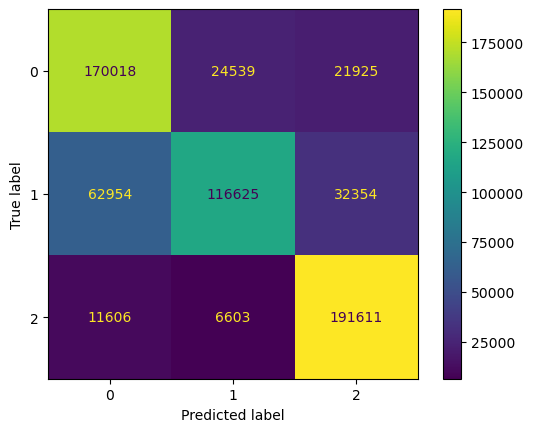

LogReg | accuracy std = 0.00022090509185609575
LogReg |  precision std = 0.0010734790746000549
LogReg | recall std = 0.00057913115765648
LogReg |f1 std = 0.002386840924496544
LogReg | roc_auc std = 0.0004801825790738434


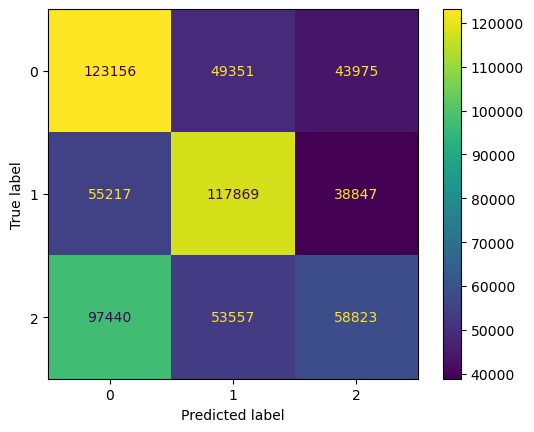

Tree | accuracy std = 0.00155804730514942
Tree |  precision std = 0.000660085011277686
Tree | recall std = 0.0018233787860030617
Tree |f1 std = 0.00022299968681450938
Tree | roc_auc std = 0.001000191231820124


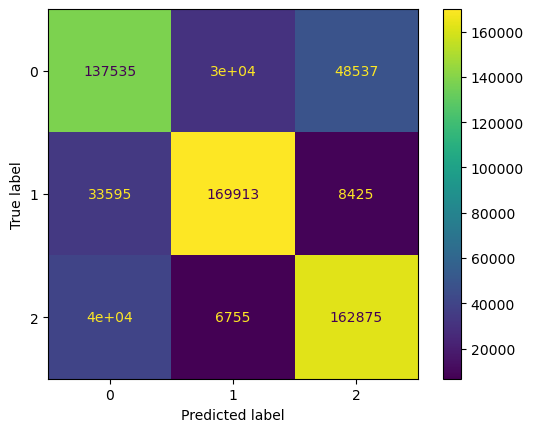

Xgboost | accuracy std = 0.0005004957017732347
Xgboost |  precision std = 0.0003067327208592851
Xgboost | recall std = 0.0012235284486421453
Xgboost |f1 std = 0.0014095225527277699
Xgboost | roc_auc std = 0.0007736108176667785


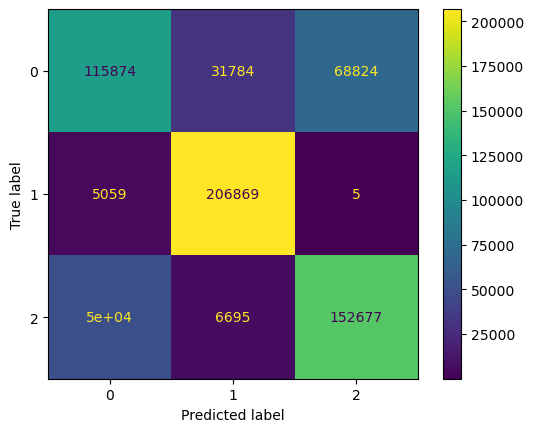

Forest | accuracy std = 0.00028442872337012084
Forest |  precision std = 0.0010928099173021632
Forest | recall std = 0.000717914557242103
Forest |f1 std = 0.001021697391042023
Forest | roc_auc std = 0.0003160101410484937


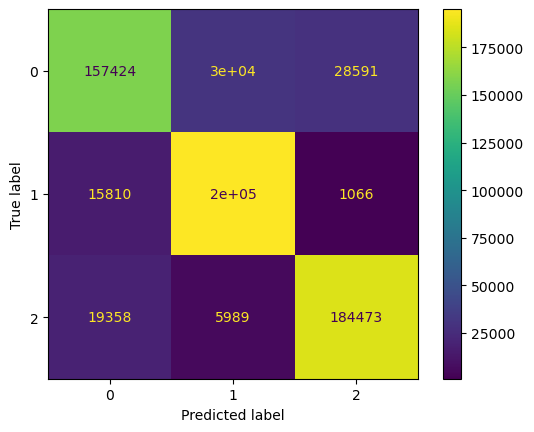

Adaboost | accuracy std = 0.0005308587473050412
Adaboost |  precision std = 0.0024592370851957523
Adaboost | recall std = 0.0010653301693207694
Adaboost |f1 std = 0.0018167860829680041
Adaboost | roc_auc std = 0.0008824713908608409


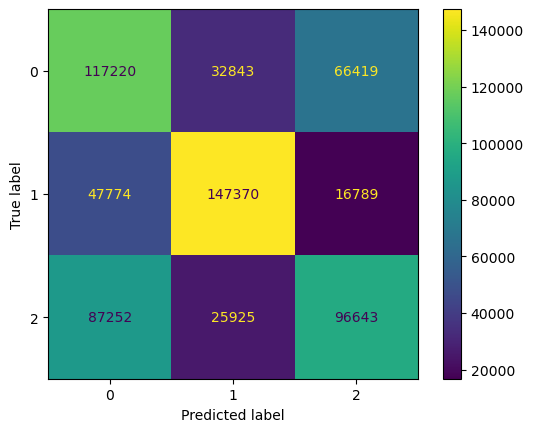

In [347]:
metrics_2 = evaluate_model(xtrain_2, ytrain_2, 2)

In [348]:
metrics_2

,names,accuracy,precision,recall,f1,roc_auc
0,KNN,0.748477,0.755002,0.748789,0.742142,0.888435
1,LogReg,0.469825,0.465067,0.468116,0.460081,0.655765
2,Tree,0.737824,0.737369,0.737750,0.736643,0.802330
3,Xgboost,0.742590,0.735715,0.745072,0.734660,0.889800
4,Forest,0.841530,0.840689,0.841952,0.839278,0.948515
5,Adaboost,0.567766,0.573389,0.567037,0.567139,0.768297


## Feature Engineering - Experiment 3

1. Missing values: Impute with random samples
2. Encoding: One-hot
3. Transformation: Yeo-Johnson
4. Outliers: Winsorize Q95 - Q5
5. Scaling: RobustScaler
6. Sampling: SMOTE
7. Feature Selection: Permutation Importance

In [384]:
xtrain_3, ytrain_3 = xtrain.copy(), ytrain.copy()

In [385]:
encoder = OneHotEncoder()

transformer = PowerTransformer(method = 'yeo-johnson')

In [386]:
def winsorize(dataframe):
    
    for column in dataframe:
        
        up = dataframe[column].quantile(0.95)
        low = dataframe[column].quantile(0.05)
        
        dataframe[column] = np.where(dataframe[column] > up, up, np.where(dataframe[column] < low, low, dataframe[column]))
        
    return dataframe
    
func_winsorize = FunctionTransformer(winsorize)    

In [387]:
scaler = RobustScaler()

In [388]:
def random_sample_imputer(dataframe):
    
    for column in dataframe:
        
        num_of_nans = dataframe[column].isnull().sum()
        
        sample = dataframe[column].dropna().sample(num_of_nans, replace = True)
        
        sample.index = dataframe.loc[dataframe[column].isnull(), column].index
        
        dataframe.loc[dataframe[column].isnull(), column] = sample
        
    return dataframe
    
func_random_sample_imputer = FunctionTransformer(random_sample_imputer)

In [389]:
num_columns_3

['DATE_year',
 'DATE_month',
 'DATE_day',
 'Weight',
 'Num_of_days_with_bad_Mental_Health',
 'Num_of_days_with_bad_Physical_health']

In [390]:
num_columns_3 = xtrain_3.select_dtypes('number').columns.tolist()
cat_columns_3 = xtrain_3.select_dtypes('O').columns.tolist()

num_pipeline = Pipeline([
    
    ('imputer', func_random_sample_imputer),
    ('scaler', scaler),
    ('func_log_transformer', transformer),
    ('func_winsorize', func_winsorize),
    ('imputer_2', func_random_sample_imputer),

])


cat_pipeline = Pipeline([
    ('cat_imputer', func_random_sample_imputer),
    ('encoder', encoder)
])

preprocessing_pipeline_3 = ColumnTransformer([
    
    ('num', num_pipeline, num_columns_3),
    ('cat', cat_pipeline, cat_columns_3),

], verbose_feature_names_out = False, remainder = 'passthrough')

In [391]:
xtrain_3 = preprocessing_pipeline_3.fit_transform(xtrain_3)

In [392]:
xtrain_3.isnull().sum()

DATE_year                               0
DATE_month                              0
DATE_day                                0
Weight                                  0
Num_of_days_with_bad_Mental_Health      0
Num_of_days_with_bad_Physical_health    0
HighBP_1                                0
HighBP_2                                0
High_cholestrol_1                       0
High_cholestrol_2                       0
Cholestrol_check_1                      0
Cholestrol_check_2                      0
SMoker_1                                0
SMoker_2                                0
Stroke_1                                0
Stroke_2                                0
HeartDiseaseorAttack_1                  0
HeartDiseaseorAttack_2                  0
Physical_activity_1                     0
Physical_activity_2                     0
Has_fruits_1                            0
Has_fruits_2                            0
Has_veggies_1                           0
Has_veggies_2                     

In [393]:
sampler = SMOTE()

xtrain_3, ytrain_3 = sampler.fit_resample(xtrain_3, ytrain_3 )

### Permutation feature importance

Permutation feature importance is a model inspection technique that can be used for any fitted estimator when the data is tabular. This is especially useful for non-linear or opaque estimators. The permutation feature importance is defined to be the decrease in a model score when a single feature value is randomly shuffled [1]. This procedure breaks the relationship between the feature and the target, thus the drop in the model score is indicative of how much the model depends on the feature. This technique benefits from being model agnostic and can be calculated many times with different permutations of the feature.

In [ ]:
scoring = ['neg_log_loss']

model = xgb.XGBClassifier().fit(xtrain_3, ytrain_3)

In [396]:
r_multi = permutation_importance(model, xtrain_3, ytrain_3, n_repeats=10, random_state=0, scoring=scoring)

In [397]:
values = {column: importance for column, importance in zip(xtrain_3.columns,r_multi['neg_log_loss']['importances_mean'])}
values

{'DATE_year': 0.00186073095267853,
 'DATE_month': 0.10434020187035646,
 'DATE_day': 0.02096508599615369,
 'Weight': 0.02982770818046796,
 'Num_of_days_with_bad_Mental_Health': 0.013961304267644286,
 'Num_of_days_with_bad_Physical_health': 0.0172652054695178,
 'HighBP_1': 0.09523789588677863,
 'HighBP_2': 0.0384392855877268,
 'High_cholestrol_1': 0.06022700259458926,
 'High_cholestrol_2': 0.03530403958623274,
 'Cholestrol_check_1': 0.002612004880629709,
 'Cholestrol_check_2': 0.004740068473587339,
 'SMoker_1': 0.03335020650442124,
 'SMoker_2': 0.033611023781653426,
 'Stroke_1': 0.002535323164634312,
 'Stroke_2': 0.004899371012274256,
 'HeartDiseaseorAttack_1': 0.005393265310109507,
 'HeartDiseaseorAttack_2': 0.012660570888321555,
 'Physical_activity_1': 0.026428635869763815,
 'Physical_activity_2': 0.03514640344754817,
 'Has_fruits_1': 0.001355486457569527,
 'Has_fruits_2': 0.000818398141741955,
 'Has_veggies_1': 0.004473918584160718,
 'Has_veggies_2': 0.008262673821839529,
 'Heavy_alco

In [406]:
selected_columns_3 = [column for column, imp in values.items() if imp > 0.009]
selected_columns_3

['DATE_month',
 'DATE_day',
 'Weight',
 'Num_of_days_with_bad_Mental_Health',
 'Num_of_days_with_bad_Physical_health',
 'HighBP_1',
 'HighBP_2',
 'High_cholestrol_1',
 'High_cholestrol_2',
 'SMoker_1',
 'SMoker_2',
 'HeartDiseaseorAttack_2',
 'Physical_activity_1',
 'Physical_activity_2',
 'General_health_1',
 'General_health_2',
 'General_health_3',
 'General_health_4',
 'General_health_5',
 'Difficulty_walking_1',
 'Difficulty_walking_2',
 'Education_level_1',
 'Education_level_2',
 'Education_level_3',
 'INCOME_1',
 'INCOME_2',
 'INCOME_3',
 'INCOME_5',
 'INCOME_6',
 'INCOME_8',
 'INCOME_9',
 'INCOME_10',
 'INCOME_11',
 'Age_1',
 'Age_2',
 'Age_3',
 'Age_4',
 'Age_5',
 'Age_6',
 'Age_7',
 'Age_8',
 'Age_9',
 'Age_10',
 'Age_11',
 'Age_12',
 'Age_13',
 'Sex_1',
 'Sex_2',
 'CHILDREN_1',
 'CHILDREN_2']

In [407]:
f'{len(selected_columns_3)} selected out of {len(xtrain_3.columns)}'

'50 selected out of 71'

In [408]:
xtrain_3 = xtrain_3[selected_columns_3]

KNN | accuracy std = 0.0008746457796648342
KNN |  precision std = 0.0004538506555446241
KNN | recall std = 0.00023864913397083924
KNN |f1 std = 0.0012492005522092603
KNN | roc_auc std = 0.00022936157260312272


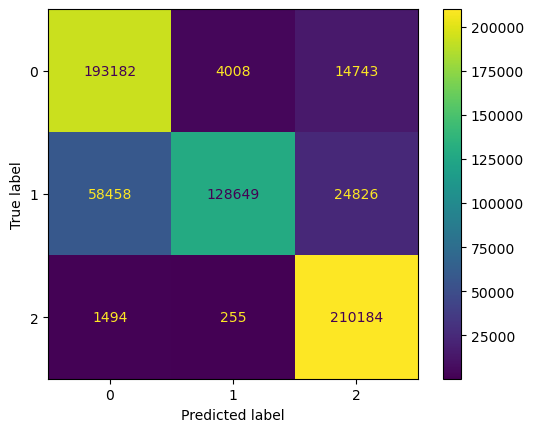

LogReg | accuracy std = 0.00047854708397494
LogReg |  precision std = 0.00032320286354201846
LogReg | recall std = 0.0012118124420656142
LogReg |f1 std = 0.0005099827878650669
LogReg | roc_auc std = 0.0003726531439907545


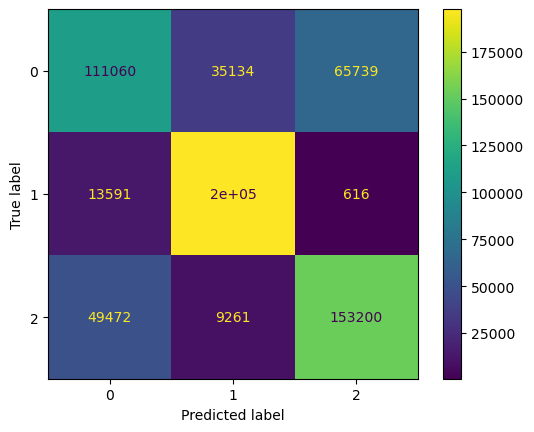

Tree | accuracy std = 0.0010558301632135902
Tree |  precision std = 0.0009405293397775898
Tree | recall std = 0.00038997559949325406
Tree |f1 std = 0.0011894132149007483
Tree | roc_auc std = 0.0009102438129867578


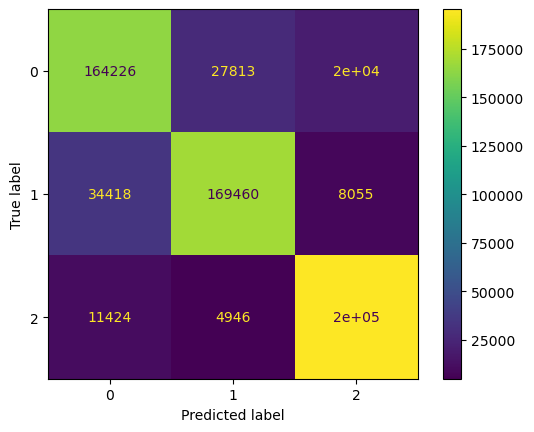

Xgboost | accuracy std = 0.0016964656188796653
Xgboost |  precision std = 0.00046299018377338636
Xgboost | recall std = 0.00037614578220260085
Xgboost |f1 std = 0.000637946932493674
Xgboost | roc_auc std = 0.0008705198276401482


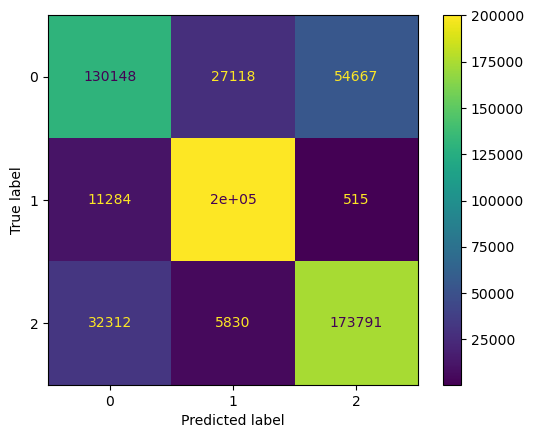

Forest | accuracy std = 0.0008379625482250188
Forest |  precision std = 0.0008853436401917745
Forest | recall std = 0.00015993203860750185
Forest |f1 std = 0.00027679575164737415
Forest | roc_auc std = 0.00013926740894812782


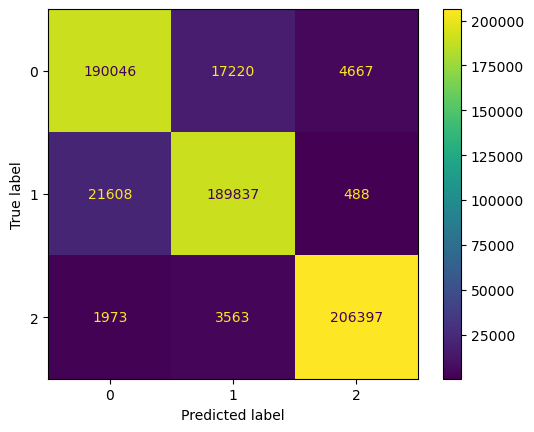

Adaboost | accuracy std = 0.0028609726869473916
Adaboost |  precision std = 0.0031232180320569284
Adaboost | recall std = 0.000698307841357122
Adaboost |f1 std = 0.0016395263475746623
Adaboost | roc_auc std = 0.0012828223742797676


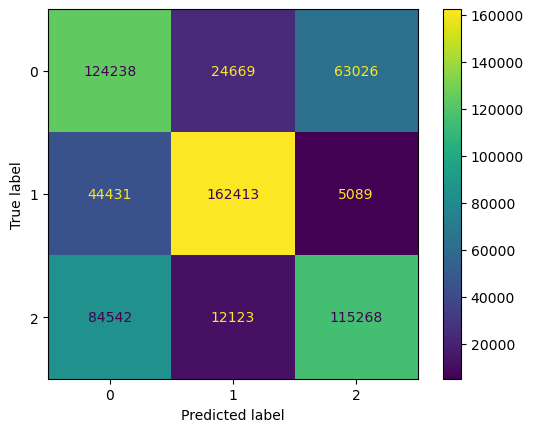

In [409]:
metrics_3 = evaluate_model(xtrain_3, ytrain_3, 3)

## Reading Results

In [415]:
metrics_0.index = [f'{names}_0' for names in metrics_0['names']]
metrics_0.drop(['names'], axis = 1, inplace = True)

metrics_1.index = [f'{names}_1' for names in metrics_1['names']]
metrics_1.drop(['names'], axis = 1, inplace = True)


metrics_2.index = [f'{names}_2' for names in metrics_2['names']]
metrics_2.drop(['names'], axis = 1, inplace = True)


metrics_3.index = [f'{names}_3' for names in metrics_3['names']]
metrics_3.drop(['names'], axis = 1, inplace = True)

In [422]:
results = pd.concat([baseline, metrics_0, metrics_1, metrics_2, metrics_3])

results.sort_values(by = ['roc_auc', 'recall', 'f1'], ascending = [False, False, False])

,accuracy,precision,recall,f1,roc_auc
Forest_3,0.922048,0.922499,0.922026,0.921986,0.985374
KNN_3,0.836477,0.857421,0.836398,0.828662,0.952344
Forest_2,0.841530,0.840689,0.841952,0.839278,0.948515
Xgboost_3,0.794224,0.789960,0.793951,0.788115,0.920884
Xgboost_2,0.742590,0.735715,0.745072,0.734660,0.889800
KNN_2,0.748477,0.755002,0.748789,0.742142,0.888435
LogReg_3,0.726508,0.717695,0.726846,0.718757,0.881589
Tree_3,0.832175,0.831399,0.832879,0.830723,0.874125
Adaboost_3,0.632458,0.643821,0.631070,0.635604,0.810831
Tree_2,0.737824,0.737369,0.737750,0.736643,0.802330


In [423]:
metrics = results.columns.tolist()

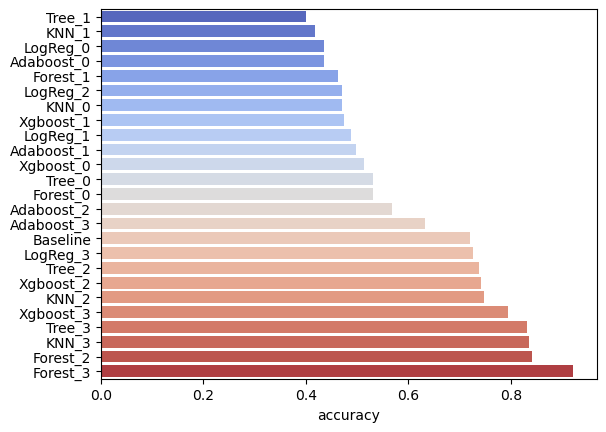

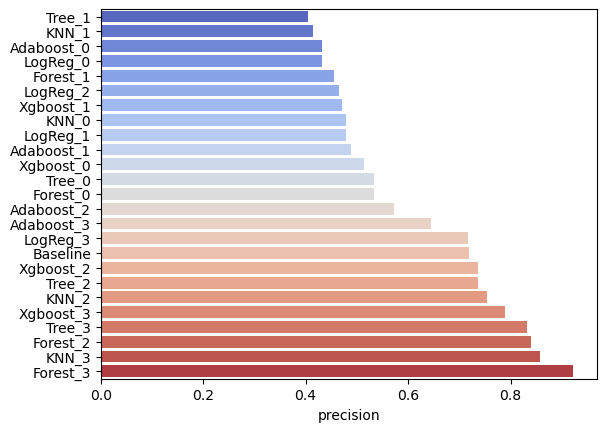

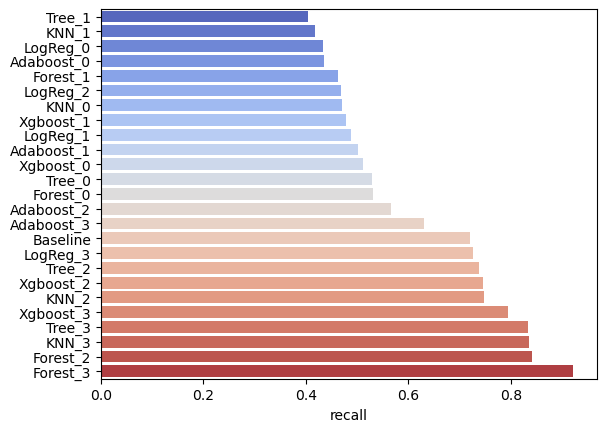

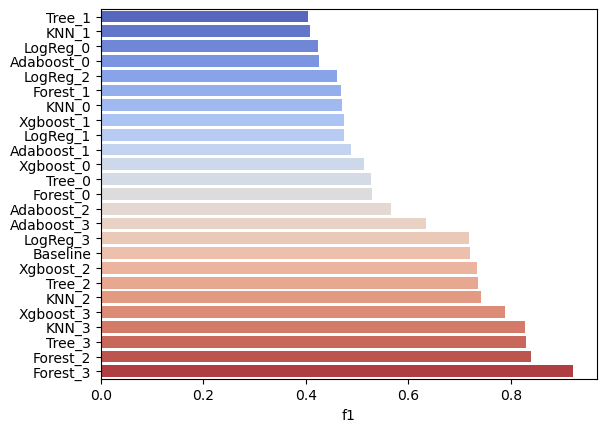

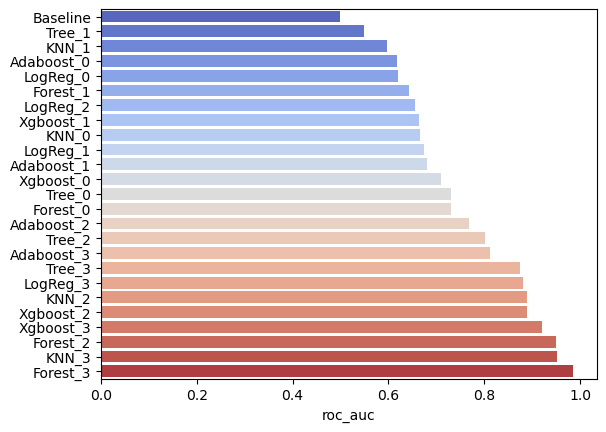

In [425]:
for metric in metrics:
    
    plt.figure()
    
    sns.barplot(data = results.sort_values(by = [metric]), y  = results.sort_values(by = [metric]).index, x = metric, palette = 'coolwarm')

## Training Preprocessor of best model

In [426]:
encoder = OneHotEncoder()

transformer = PowerTransformer(method = 'yeo-johnson')

scaler = RobustScaler()

def winsorize(dataframe):
    
    for column in dataframe:
        
        up = dataframe[column].quantile(0.95)
        low = dataframe[column].quantile(0.05)
        
        dataframe[column] = np.where(dataframe[column] > up, up, np.where(dataframe[column] < low, low, dataframe[column]))
        
    return dataframe
    
func_winsorize = FunctionTransformer(winsorize)    


def random_sample_imputer(dataframe):
    
    for column in dataframe:
        
        num_of_nans = dataframe[column].isnull().sum()
        
        sample = dataframe[column].dropna().sample(num_of_nans, replace = True)
        
        sample.index = dataframe.loc[dataframe[column].isnull(), column].index
        
        dataframe.loc[dataframe[column].isnull(), column] = sample
        
    return dataframe
    
func_random_sample_imputer = FunctionTransformer(random_sample_imputer)

In [427]:
num_columns = xtrain.select_dtypes('number').columns.tolist()
cat_columns = xtrain.select_dtypes('O').columns.tolist()

num_pipeline = Pipeline([
    
    ('imputer', func_random_sample_imputer),
    ('scaler', scaler),
    ('func_log_transformer', transformer),
    ('func_winsorize', func_winsorize),
    ('imputer_2', func_random_sample_imputer),

])


cat_pipeline = Pipeline([
    ('cat_imputer', func_random_sample_imputer),
    ('encoder', encoder)
])

preprocessing_pipeline = ColumnTransformer([
    
    ('num', num_pipeline, num_columns),
    ('cat', cat_pipeline, cat_columns),

], verbose_feature_names_out = False, remainder = 'passthrough')

In [428]:
xtrain = preprocessing_pipeline.fit_transform(xtrain)

xtest = preprocessing_pipeline.transform(xtest)

xvalidation = preprocessing_pipeline.transform(xvalidation)

In [430]:
sampler = SMOTE()

xtrain, ytrain = sampler.fit_resample(xtrain, ytrain )

In [431]:
## feature selection


xtrain = xtrain[selected_columns_3]

xtest = xtest[selected_columns_3]

xvalidation = xvalidation[selected_columns_3]

## Hyperparameter Tuning

In essence, Bayesian optimization is like a smart trial-and-error method. It uses information from past evaluations to make informed decisions about where to explore next in the hyperparameter space, aiming to find the best set of hyperparameters for optimal model performance.

In [432]:
from skopt import BayesSearchCV
from skopt.space import Real, Integer, Categorical

## Ensembling Best Two Models

In [455]:
ensemble_model = VotingClassifier([
    ('knn', KNeighborsClassifier()),
    ('rf', RandomForestClassifier()),
], voting = 'soft')

In [456]:
# search_space = {
#     'ext__n_estimators': [200, 400, 600, 800, 1000],
#     'ext__max_features': [0.1,0.2, 0.5, 0.8, 1.0],
#     'ext__min_samples_split': range(2, 20),
#     'ext__min_samples_leaf': range(1, 20),
#     'ext__bootstrap': [True, False],
#     'forest__n_estimators': [200, 400, 600, 800, 1000],
#     'forest__max_features': [0.1,0.2, 0.5, 0.8, 1.0],
#     'forest__min_samples_split': range(2, 20),
#     'forest__min_samples_leaf': range(1, 20),
#     'forest__bootstrap': [True, False]
# }

In [469]:
param_space = {
    'knn__n_neighbors': np.arange(1, 40),                  # Number of neighbors for k-NN
    'knn__weights': ['uniform', 'distance'],      # Weight function for k-NN
    'rf__n_estimators': np.arange(50, 1000),                # Number of trees in the forest
    'rf__max_depth': np.arange(5, 25),                     # Maximum depth of the trees
    'rf__min_samples_split': np.arange(2, 15),             # Minimum samples required to split an internal node
    'rf__min_samples_leaf': np.arange(1, 6),               # Minimum samples required to be at a leaf node
}


In [470]:
cv = StratifiedKFold(n_splits=5)#shuffle=True)

In [471]:
# Perform Bayesian optimization

np.int = int



bayes_search = BayesSearchCV(
    ensemble_model,
    param_space,
    n_iter=20,               # Number of iterations (adjust as needed)
    scoring='roc_auc_ovr_weighted',  # Use an appropriate scoring metric
    n_jobs=-1,               # Use all available CPUs
    cv=cv,                    # Number of cross-validation folds
    random_state=42
).fit(xvalidation, yvalidation)

In [472]:
bayes_search.best_score_

0.7783041275099747

In [473]:
bayes_search.best_params_

OrderedDict([('knn__n_neighbors', 36),
             ('knn__weights', 'distance'),
             ('rf__max_depth', 13),
             ('rf__min_samples_leaf', 3),
             ('rf__min_samples_split', 12),
             ('rf__n_estimators', 211)])

## Model Training

In [477]:
model_1 = RandomForestClassifier(n_estimators = 211, 
                                min_samples_split = 12,
                                min_samples_leaf = 3,
                                max_depth = 13,
                                warm_start = True)

model_2 = KNeighborsClassifier(n_neighbors = 36,
                              weights = 'distance',
                               #warm_start = True
                              )

model = VotingClassifier([
    ('forest', model_1),
    ('knn', model_2)
], voting = 'soft')

In [480]:
names, accuracy, precision, recall, f1, roc_auc = [], [], [], [], [], []



cv = KFold(shuffle = True)


acc  = cross_val_score(model, xtrain, ytrain, cv = cv, scoring = 'accuracy').mean()
accuracy.append(acc)


prec =  cross_val_score(model, xtrain, ytrain, cv = cv, scoring = 'precision_macro').mean()
precision.append(prec)



rec = cross_val_score(model, xtrain, ytrain, cv = cv, scoring = 'recall_macro').mean()
recall.append(rec)



f1_ = cross_val_score(model, xtrain, ytrain, cv = cv, scoring = 'f1_macro').mean()
f1.append(f1_)



auc = cross_val_score(model, xtrain, ytrain, cv = cv, scoring = 'roc_auc_ovr_weighted').mean()
roc_auc.append(auc)

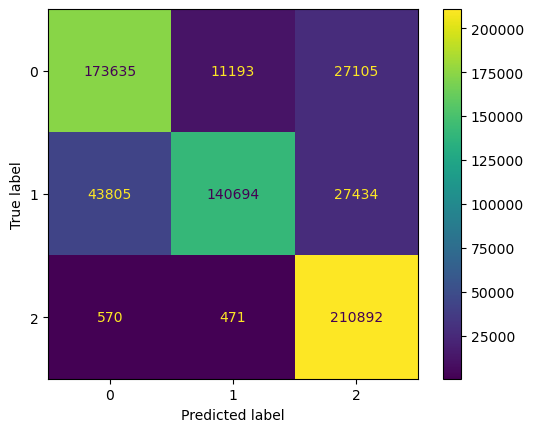

,accuracy,precision,recall,f1,roc_auc
Train,0.826132,0.838139,0.825785,0.821237,0.961543


In [484]:
#yproba = cross_val_predict(model, xtrain, ytrain, cv=cv, method = 'predict_proba')


#fpr, tpr, thresh = roc_curve(ytrain, yproba)      

#plt.plot(fpr, tpr, label = f'AUC: {auc}')
#plt.xlabel('False positive rate'); plt.ylabel('False positive rate'); plt.legend();plt.show();

ypred_class = cross_val_predict(model, xtrain, ytrain, cv= cv)
cm = confusion_matrix(ytrain, ypred_class)

ConfusionMatrixDisplay(cm).plot();plt.show();

pd.DataFrame({
    'accuracy': accuracy,
    'precision':precision ,
    'recall': recall,
    'f1': f1,
    'roc_auc': roc_auc
    }, index=['Train'])  

## Learning Curves

In [501]:
validation_recall = []
train_recall = []

for sample in range(100, len(xtrain), 1000):
        
    model.fit(xtrain[:sample], ytrain[:sample])
    
    
    train_pred = model.predict(xtrain[:sample])
    
    
    train_recall.append(recall_score(ytrain[:sample], train_pred, average = 'macro'))
    
    val_pred = model.predict(xvalidation)
    
    validation_recall.append(recall_score(yvalidation, val_pred,  average = 'macro'))
    
    print(f'Epoch_{sample}')

Epoch_100
Epoch_1100
Epoch_2100
Epoch_3100
Epoch_4100
Epoch_5100
Epoch_6100
Epoch_7100
Epoch_8100
Epoch_9100
Epoch_10100
Epoch_11100
Epoch_12100
Epoch_13100
Epoch_14100
Epoch_15100
Epoch_16100
Epoch_17100
Epoch_18100
Epoch_19100
Epoch_20100
Epoch_21100
Epoch_22100
Epoch_23100
Epoch_24100
Epoch_25100
Epoch_26100
Epoch_27100
Epoch_28100
Epoch_29100
Epoch_30100
Epoch_31100
Epoch_32100
Epoch_33100
Epoch_34100
Epoch_35100
Epoch_36100
Epoch_37100
Epoch_38100
Epoch_39100
Epoch_40100
Epoch_41100
Epoch_42100
Epoch_43100
Epoch_44100
Epoch_45100
Epoch_46100
Epoch_47100
Epoch_48100
Epoch_49100
Epoch_50100
Epoch_51100
Epoch_52100
Epoch_53100
Epoch_54100
Epoch_55100
Epoch_56100
Epoch_57100
Epoch_58100
Epoch_59100
Epoch_60100
Epoch_61100
Epoch_62100
Epoch_63100
Epoch_64100
Epoch_65100
Epoch_66100
Epoch_67100
Epoch_68100
Epoch_69100
Epoch_70100
Epoch_71100
Epoch_72100
Epoch_73100
Epoch_74100
Epoch_75100
Epoch_76100
Epoch_77100
Epoch_78100
Epoch_79100
Epoch_80100
Epoch_81100
Epoch_82100
Epoch_83100
Epo

KeyboardInterrupt: 

In [496]:
ytrain.unique(), np.unique(train_pred)

(array([1, 0, 2]), array([0, 1, 2]))

In [ ]:
# train_error

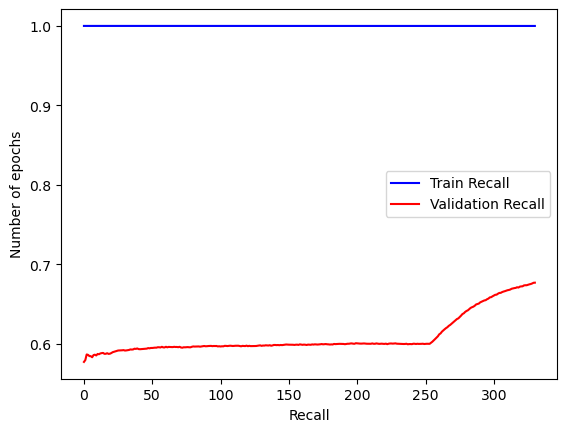

In [504]:
plt.plot(np.sqrt(train_recall), label = 'Train Recall', color = 'blue')

plt.plot(np.sqrt(validation_recall), label = 'Validation Recall', color = 'red')
plt.xlabel('Recall');plt.ylabel('Number of epochs')
plt.legend()

## Early stopping


In [516]:
yvalidation[:2]

385049    1
279307    1
Name: Diabetes_status, dtype: int32

In [522]:
maximum = 0
best_model = None
best_epoch = None
tolerance_level = 0

for epoch in range(100):
    
    model = VotingClassifier([
    ('forest', model_1),
    ('knn', model_2)
    ], voting = 'soft')
    
    model.fit(xtrain, ytrain)
    
    pred = model.predict(xvalidation)
    
    score = recall_score(yvalidation, pred, average = 'macro')
    
    if score > maximum:
        
        maximum = score
        
        best_model = clone(model)
        
        best_epoch = epoch
        
        tolerance_level = 0
        
    else:
        tolerance_level = tolerance_level + 1
        
    if tolerance_level > 10:
        
        print(f'Early stopping at epoch {epoch} as tolerance limit reached.')
        break

    print(f'Completed epoch {epoch} - Recall Score: {score:.4f}')

print(f'Reached minimum at epoch {best_epoch} with max recall score: {maximum:.4f}')

Completed epoch 0 - Recall Score: 0.4748
Completed epoch 1 - Recall Score: 0.4745
Completed epoch 2 - Recall Score: 0.4749
Completed epoch 3 - Recall Score: 0.4764
Completed epoch 4 - Recall Score: 0.4753
Completed epoch 5 - Recall Score: 0.4751
Completed epoch 6 - Recall Score: 0.4754
Completed epoch 7 - Recall Score: 0.4749
Completed epoch 8 - Recall Score: 0.4740
Completed epoch 9 - Recall Score: 0.4756
Completed epoch 10 - Recall Score: 0.4750
Completed epoch 11 - Recall Score: 0.4753
Completed epoch 12 - Recall Score: 0.4745
Completed epoch 13 - Recall Score: 0.4751
Early stopping at epoch 14 as tolerance limit reached.
Reached minimum at epoch 3 with max recall score: 0.4764


In [523]:
best_model

VotingClassifier(estimators=[('forest',
                              RandomForestClassifier(max_depth=13,
                                                     min_samples_leaf=3,
                                                     min_samples_split=12,
                                                     n_estimators=211,
                                                     warm_start=True)),
                             ('knn',
                              KNeighborsClassifier(n_neighbors=36,
                                                   weights='distance'))],
                 voting='soft')

In [524]:
model

VotingClassifier(estimators=[('forest',
                              RandomForestClassifier(max_depth=13,
                                                     min_samples_leaf=3,
                                                     min_samples_split=12,
                                                     n_estimators=211,
                                                     warm_start=True)),
                             ('knn',
                              KNeighborsClassifier(n_neighbors=36,
                                                   weights='distance'))],
                 voting='soft')

## Testing

In [526]:
test_pred = model.predict(xtest)

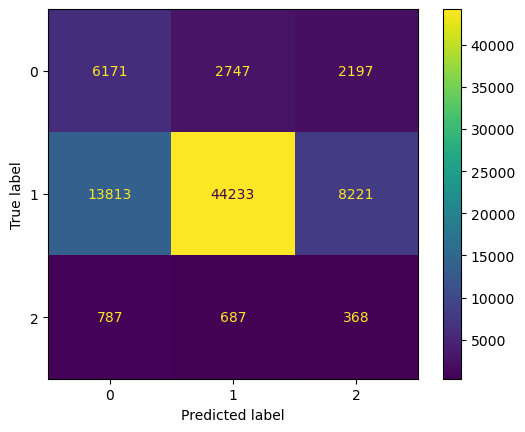

,accuracy,precision,recall,f1
Test,0.640866,0.419725,0.474158,0.407272


In [538]:
names, accuracy, precision, recall, f1, roc_auc = [], [], [], [], [], []


acc  = accuracy_score(ytest, test_pred)
accuracy.append(acc)


prec =  precision_score(ytest, test_pred, average = 'macro')
precision.append(prec)



rec = recall_score(ytest, test_pred, average = 'macro')
recall.append(rec)



f1_ = f1_score(ytest, test_pred, average = 'macro')
f1.append(f1_)



#auc = roc_auc_score(ytest, test_pred, average='weighted', multi_class = 'ovr')

#roc_auc.append(auc)


# fpr, tpr, thresh = roc_curve(ytest, model.predict_proba(xtest)[:, 1])

# plt.plot(fpr, tpr, label = f'{name}: {auc}')
# plt.xlabel('False positive rate'); plt.ylabel('False positive rate'); plt.legend();plt.show();

cm = confusion_matrix(ytest, test_pred)

ConfusionMatrixDisplay(cm).plot();plt.show();

pd.DataFrame({
    'accuracy': accuracy,
    'precision':precision ,
    'recall': recall,
    'f1': f1,
   # 'roc_auc': roc_auc
    }, index=['Test'])        

## Save model

In [550]:
import joblib

In [551]:
filename = 'Diabetes_health_indicators_model.pkl'

joblib.dump(model, filename)

['Diabetes_health_indicators_model.pkl']

In [552]:
xtest.to_csv("C:/Users/Oamen/OneDrive/Documents/DATASETS/ml_datasets_to_do/Diabetes_indication/xtest_processed.csv")

## Model is Overfitting

To do: improve model performance